In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score

Dataset - We have taken the dataset from kaggle which have total transaction of ___, out of which 492 are the fraud transaction
and remaining are the non fraud transaction. By seeing it we can clearly identified that this is imbalanced dataset

we are starting with data understanding by applyning pandas fundamental

In [2]:
credit_card_df = pd.read_csv(r"C:\Users\deepa\Panda 2024\Credit Card Fraud Project\Dataset\creditcard.csv")
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
pd.options.display.max_rows=10

In [4]:
credit_card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_card_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
         ..
V26       0
V27       0
V28       0
Amount    0
Class     0
Length: 31, dtype: int64

No NAN value in any of the column that's a good news

In [7]:
credit_card_df.isna().sum().all()

False

In [8]:
credit_card_df.Class.sum()

492

This is a binary classification problem. By looking at data we know transaction is either a fraud or non fraud

In [9]:
credit_card_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

By looking above value counts it is clear that it is imbalaced dataset

In [10]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
credit_card_df.Amount.sum()

25162590.009999998

In [12]:
credit_card_df["Amount"][credit_card_df["Class"]==1]

541         0.00
623       529.00
4920      239.93
6108       59.00
6329        1.00
           ...  
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, Length: 492, dtype: float64

In [13]:
credit_card_df["Amount"][credit_card_df["Class"]==1].sum()

60127.97

In [14]:
credit_card_df[credit_card_df["Class"]==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


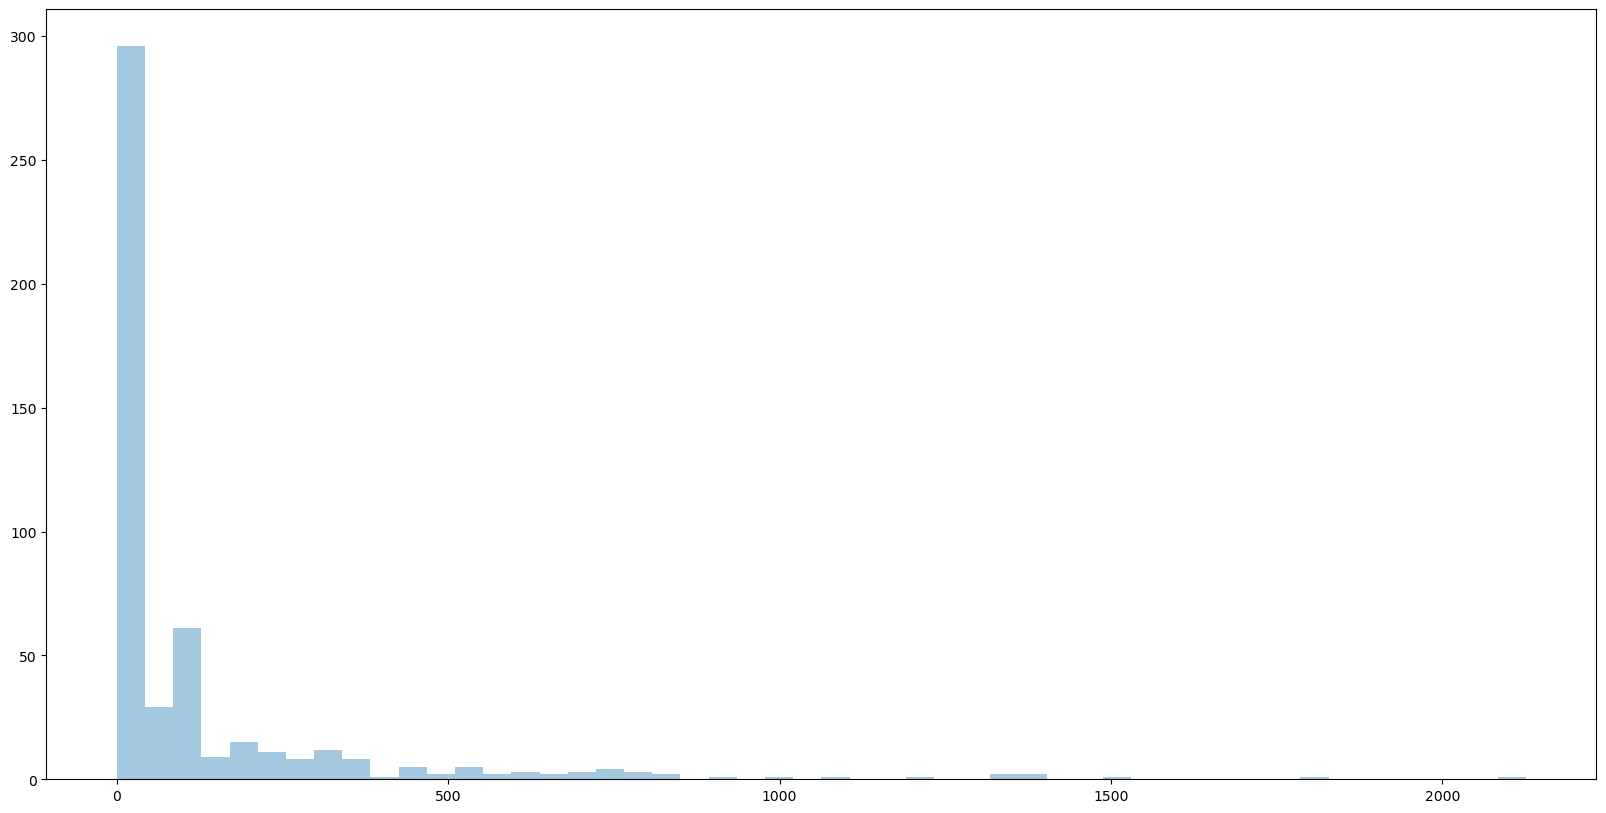

In [15]:
plt.figure(figsize=(20,10))
sns.distplot(x=credit_card_df["Amount"][credit_card_df["Class"]==1],kde=False)
plt.show()

Maximum Fraud transactions are less amount that is around 50 dollars

In [16]:
credit_card_df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
print(f"The Non Fraud Transactions are: {round(len(credit_card_df['Class'][credit_card_df['Class']==0])/len(credit_card_df['Class'])*100,2)}%")
print(f"The Non Fraud Transactions are: {round(len(credit_card_df['Class'][credit_card_df['Class']==1])/len(credit_card_df['Class'])*100,2)}%")

The Non Fraud Transactions are: 99.83%
The Non Fraud Transactions are: 0.17%


In [18]:
credit_card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

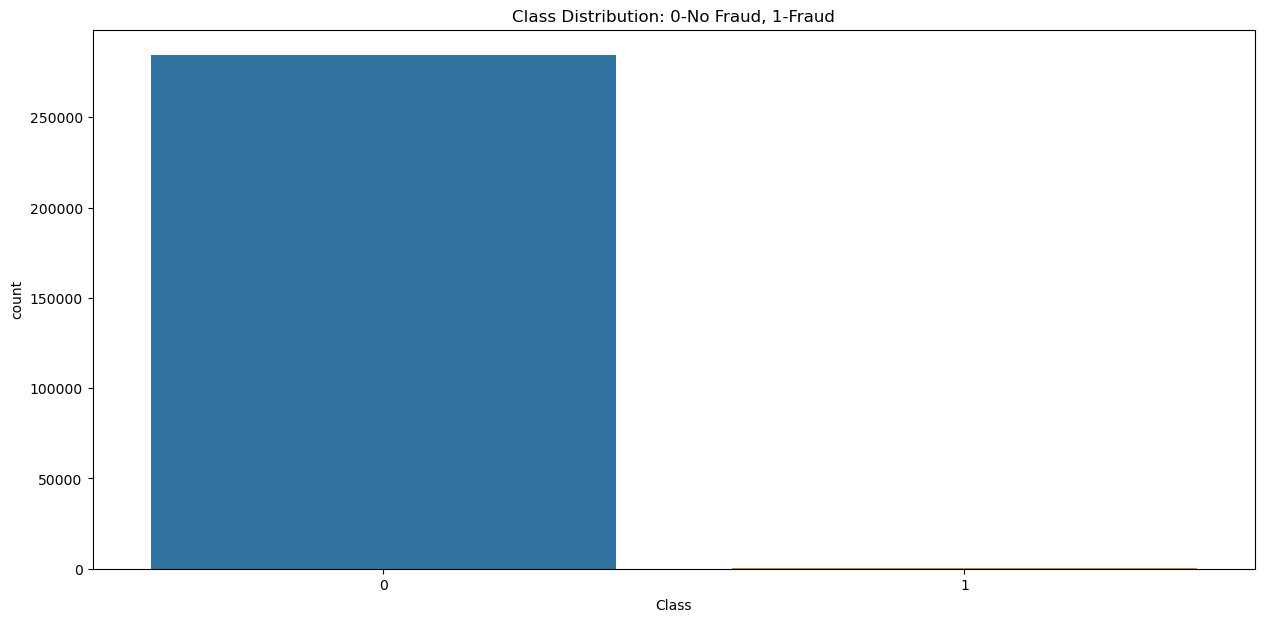

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x=credit_card_df['Class'],data=credit_card_df)
plt.title("Class Distribution: 0-No Fraud, 1-Fraud")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


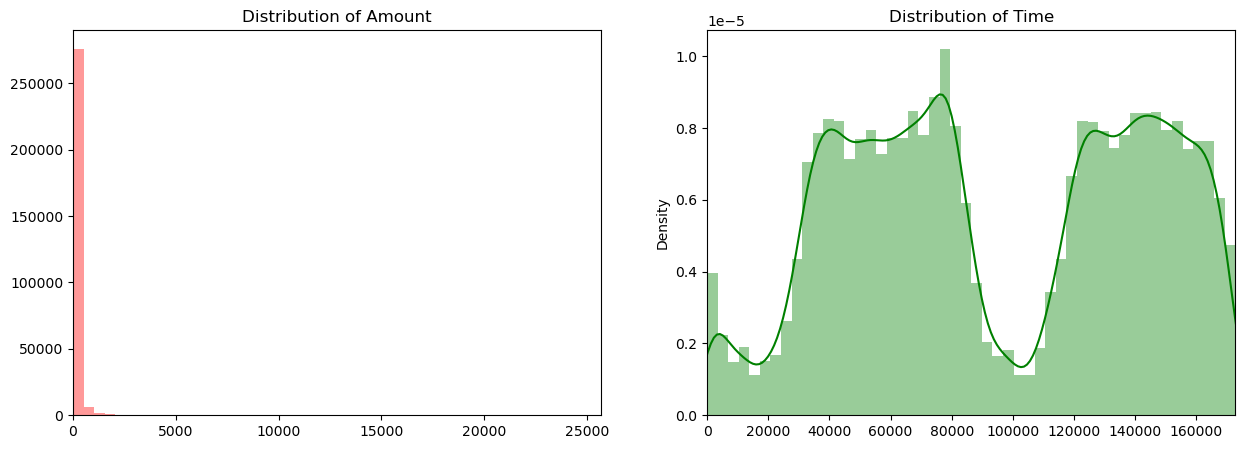

In [20]:
# Distbution of Time and Amount
fig,ax = plt.subplots(1,2,figsize=(15,5))

sns.distplot(x=credit_card_df['Amount'],ax=ax[0],kde=False,color="r")
ax[0].set_title("Distribution of Amount")
ax[0].set_xlim(min(credit_card_df['Amount']),max(credit_card_df['Amount']))

sns.distplot(x=credit_card_df['Time'], ax=ax[1],color="g")
ax[1].set_title("Distribution of Time")
ax[1].set_xlim(min(credit_card_df['Time']),max(credit_card_df['Time']))
plt.show()

In [21]:
# Scaling the Remaining two cloumns that are Time and Amount
from sklearn.preprocessing import StandardScaler, RobustScaler
Robus_scaler = RobustScaler()
credit_card_df['Amount_scale'] = Robus_scaler.fit_transform(credit_card_df['Amount'].values.reshape(-1,1))
credit_card_df['Time_scale'] = Robus_scaler.fit_transform(credit_card_df['Time'].values.reshape(-1,1))

credit_card_df = credit_card_df.drop(["Amount","Time"],axis=1)


In [22]:
# Rearranging the Columns
credit_card_df = credit_card_df[['Amount_scale', 'Time_scale','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']]

credit_card_df.head()

,Amount_scale,Time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [23]:
credit_card_df.columns

Index(['Amount_scale', 'Time_scale', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Class'],
      dtype='object')

In [24]:
# Train test split before undersampling
from sklearn.model_selection import train_test_split,StratifiedKFold

sss = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)
X = credit_card_df.drop("Class",axis=1)
y = credit_card_df['Class']

for train_index, test_index in sss.split(X,y):
    print(train_index,test_index)
    print(len(train_index),len(test_index))
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
# Checking for train test is done rightly or not (in equal proportion or not)
print("Fraud and Non Fraud Transaction after splitting:")
print(f"[ 0's: {round((len(original_ytrain[original_ytrain==1])/len(original_ytrain))*100,2)}% | 1's: {round((len(original_ytrain[original_ytrain==0])/len(original_ytrain))*100,2)}% ]")
print(f"[ 0's: {round((len(original_ytest[original_ytest==1])/len(original_ytest))*100,2)}% | 1's: {round((len(original_ytest[original_ytest==0])/len(original_ytest))*100,2)}% ]")


# Converting into array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

[ 30473  30496  31002 ... 284804 284805 284806] [    0     1     2 ... 57017 57018 57019]
227845 56962
[     0      1      2 ... 284804 284805 284806] [ 30473  30496  31002 ... 113964 113965 113966]
227845 56962
[     0      1      2 ... 284804 284805 284806] [ 81609  82400  83053 ... 170946 170947 170948]
227846 56961
[     0      1      2 ... 284804 284805 284806] [150654 150660 150661 ... 227866 227867 227868]
227846 56961
[     0      1      2 ... 227866 227867 227868] [212516 212644 213092 ... 284804 284805 284806]
227846 56961
Fraud and Non Fraud Transaction after splitting:
[ 0's: 0.17% | 1's: 99.83% ]
[ 0's: 0.17% | 1's: 99.83% ]


In [25]:
original_Xtrain

array([[ 1.78327395, -0.99498349, -1.35980713, ..., -0.18911484,
         0.13355838, -0.02105305],
       [-0.26982463, -0.99498349,  1.19185711, ...,  0.12589453,
        -0.0089831 ,  0.01472417],
       [ 4.98372109, -0.99497175, -1.35835406, ..., -0.13909657,
        -0.05535279, -0.05975184],
       ...,
       [ 0.47509257,  0.71156851, -1.24615005, ..., -0.40307615,
         0.25907773,  0.07726675],
       [-0.16781946,  0.71156851, -0.11060264, ..., -0.19372256,
         0.14398337,  0.134559  ],
       [ 0.11541955,  0.71156851, -0.41332759, ...,  0.46357404,
         0.11998961,  0.13441132]])

In [26]:
original_ytrain

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
original_ytrain

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
np.unique(original_ytrain)

array([0, 1], dtype=int64)

In [29]:
len(X)

284807

In [30]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [31]:
# Random Undersampling (loss of information)

df_shuffle = credit_card_df.sample(frac=1)

In [32]:
df_fraud = df_shuffle.loc[df_shuffle['Class']==1]
df_non_fraud = df_shuffle.loc[df_shuffle['Class']==0][:492]

combine_df = pd.concat([df_fraud,df_non_fraud])

undersample_df = combine_df.sample(frac=1)
undersample_df

,Amount_scale,Time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
244966,0.710683,0.797249,1.935471,-0.948913,-1.114630,-1.743597,-0.354357,-0.061229,-0.554269,0.100220,...,-0.018896,-0.180043,-0.532852,0.266350,0.011552,-0.388996,-0.574940,0.005769,-0.037442,0
199005,-0.293440,0.564715,-0.468699,1.336465,-0.579008,-0.392868,0.796268,-0.745615,0.689569,0.243549,...,-0.189201,0.070075,0.348409,-0.347685,-0.712302,-0.124489,0.605671,0.013971,0.133046,0
163735,-0.244673,0.369847,-0.631602,0.988949,1.228256,-0.487472,0.580647,-0.275729,1.079815,-0.166883,...,0.162237,-0.351702,-0.834355,-0.360043,-0.364289,0.367849,0.442916,-0.088008,-0.131476,0
62180,0.339831,-0.405632,1.137152,0.134520,0.196730,0.955990,-0.180340,-0.449203,0.110193,-0.016425,...,-0.083619,-0.105484,-0.459330,-0.054167,-0.034960,0.480227,-0.524949,-0.000886,0.017088,0
42784,0.328233,-0.510450,-10.940739,6.261586,-14.182339,7.183602,-9.951363,-3.860820,-13.547302,7.096472,...,-0.088342,2.267448,-0.492029,-0.239303,0.454368,-0.101611,0.446997,0.062293,-0.439770,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258403,3.828687,0.868737,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,...,3.136338,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,1
70589,3.351778,-0.361318,-2.042608,1.573578,-2.372652,-0.572676,-2.097353,-0.174142,-3.039520,-1.634233,...,0.825566,-0.723326,0.501222,-0.696892,-0.600514,0.127547,-0.786072,0.606097,0.171697,1
120988,24.328513,-0.101681,-2.102905,-6.434792,-0.668216,1.009567,-3.363899,0.510210,1.123043,-0.279681,...,3.634908,1.131621,-0.577265,-1.527686,0.672693,-0.311401,-0.462302,-0.279648,0.322888,0
42936,0.526514,-0.509722,-12.980943,6.720508,-13.455636,8.698610,-11.479552,-2.681519,-14.019291,8.218191,...,-0.843303,2.549628,-0.532228,-0.235096,0.673209,0.226598,-0.006168,-1.185696,-0.747361,1


In [33]:
undersample_df.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

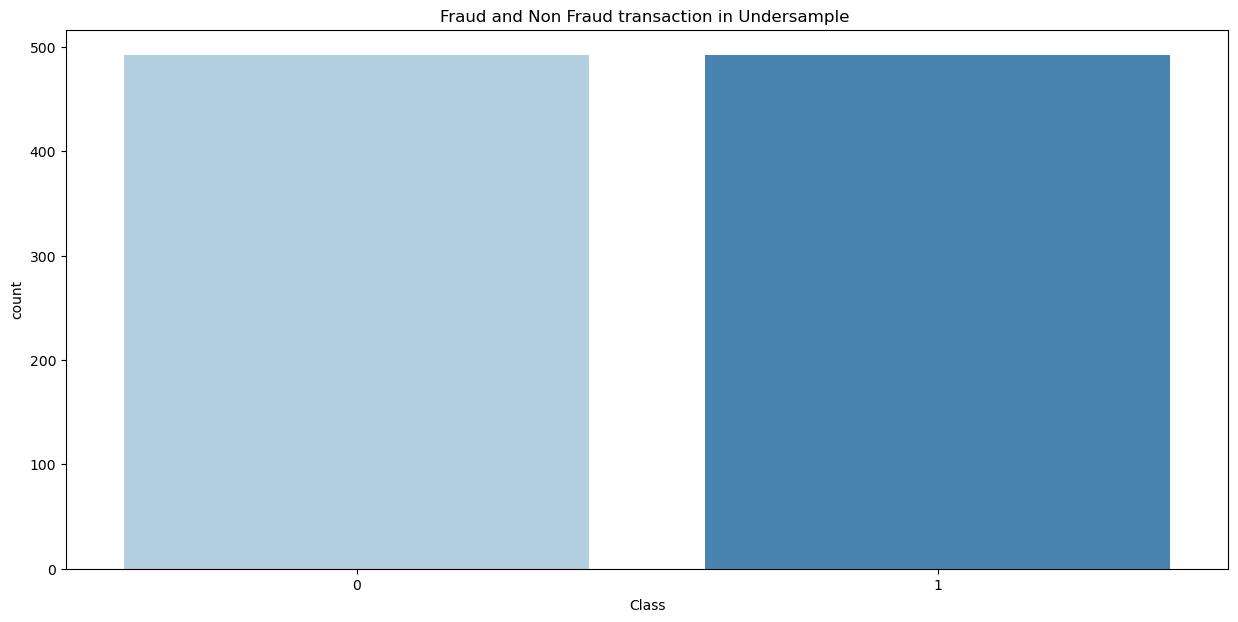

In [34]:
fig, ax = plt.subplots(1,1,figsize = (15,7))
sns.countplot(x=undersample_df['Class'],data=undersample_df,palette='Blues')
plt.title("Fraud and Non Fraud transaction in Undersample ")
plt.show()

Equal representation of Fraud and Non Fraud Transaction

# Correlation Matrices

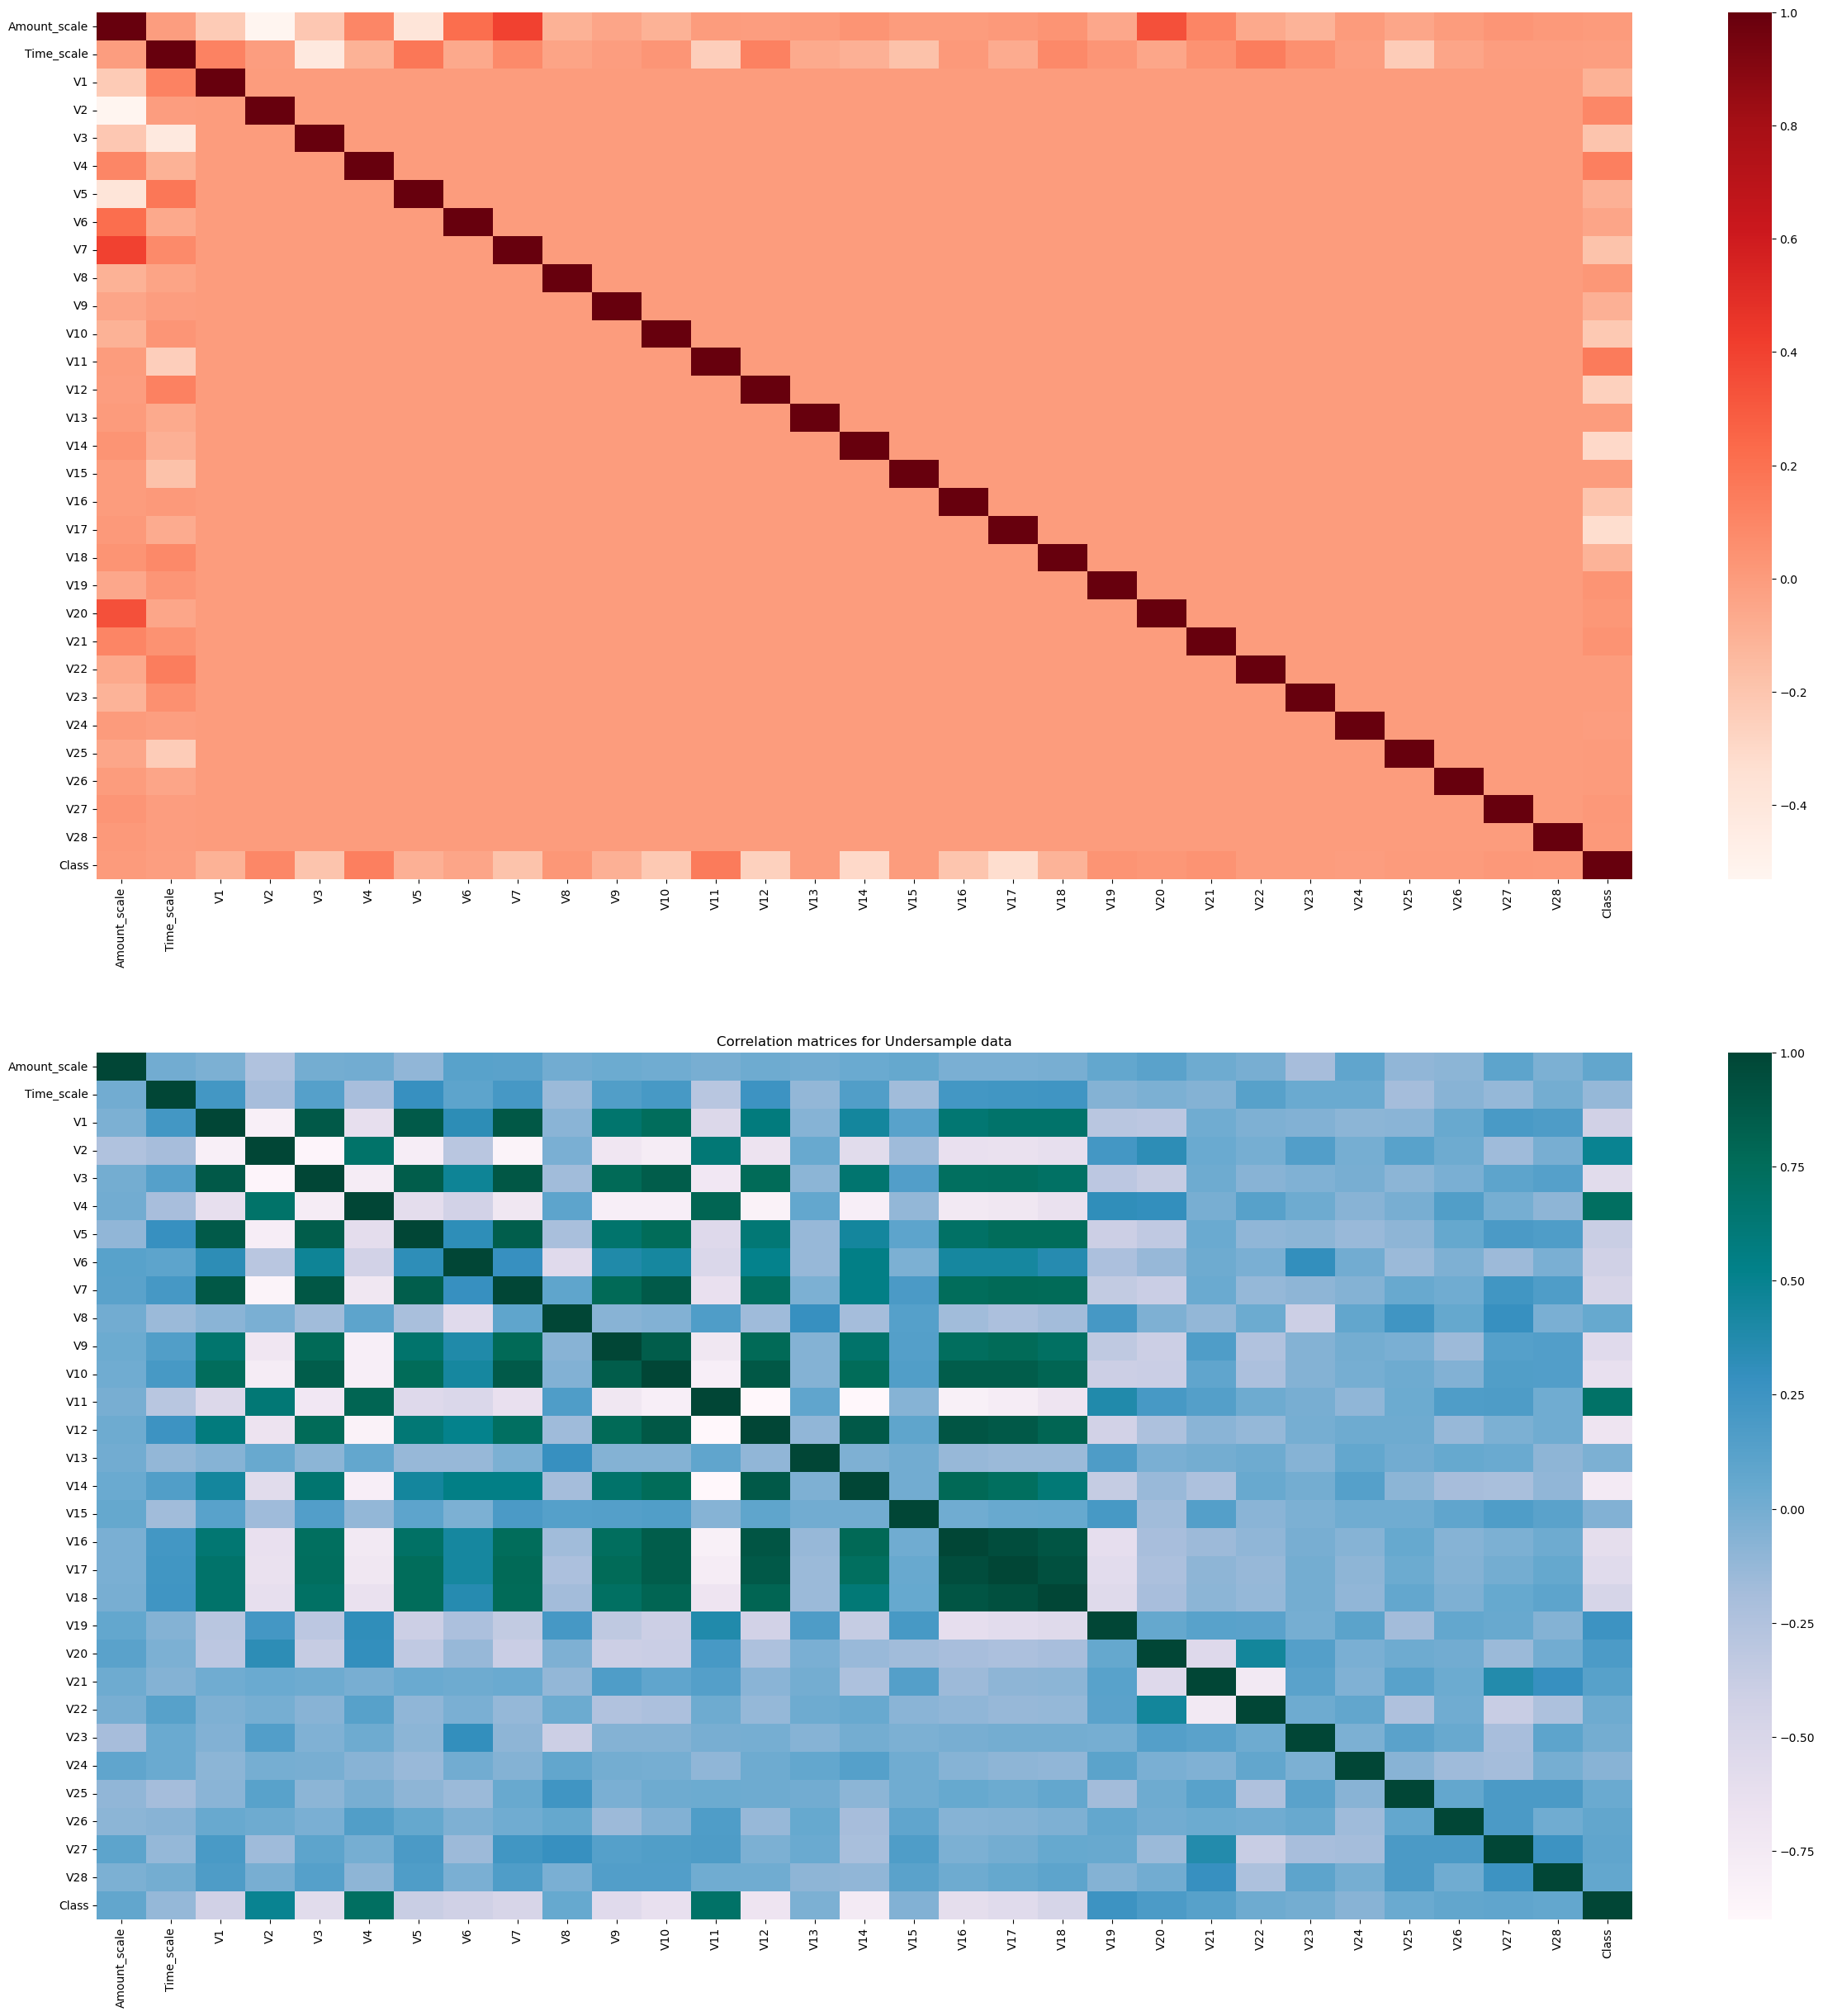

In [35]:
fig, ax = plt.subplots(2,1,figsize=(30,30))
sns.heatmap(credit_card_df.corr(),cmap='Reds',ax=ax[0])
plt.title("Correlation matrices for original credir card data")

# For under sample data
sns.heatmap(undersample_df.corr(),cmap='PuBuGn',ax=ax[1])
plt.title("Correlation matrices for Undersample data")
plt.show()

Strongly positive related = v2, v4, v11,v19
Negatively correlated = v10,v12,v14,v17

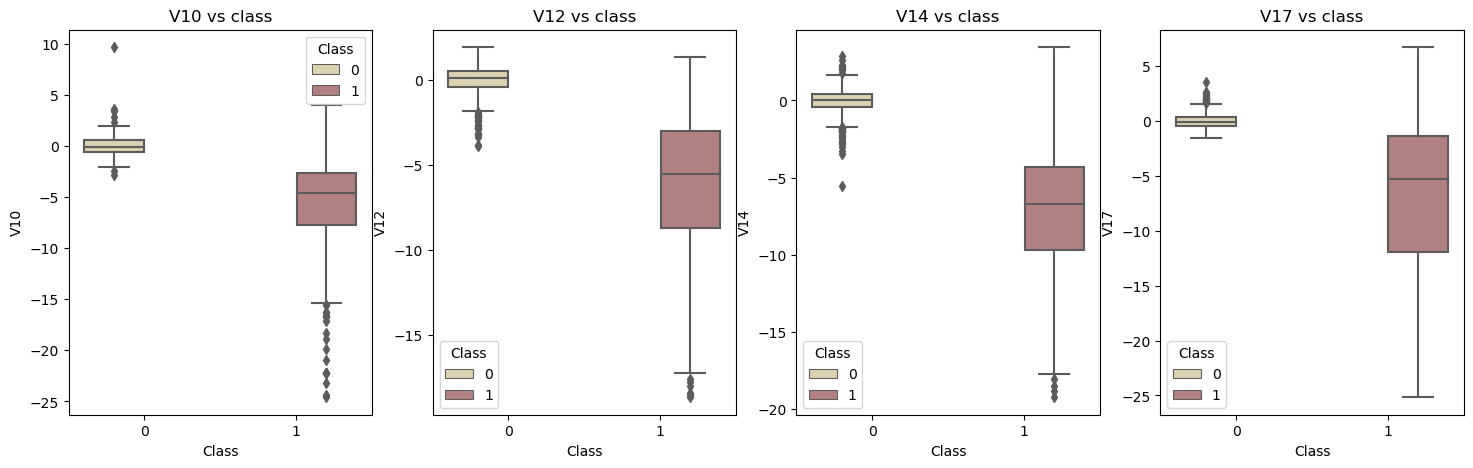

In [36]:
fig,ax = plt.subplots(1,4,figsize=(18,5))
sns.boxplot(x='Class',y='V10',data=undersample_df,hue="Class",ax=ax[0],palette='pink_r')
ax[0].set_title("V10 vs class")

sns.boxplot(x='Class',y='V12',data=undersample_df,hue="Class",ax=ax[1],palette='pink_r')
ax[1].set_title("V12 vs class")

sns.boxplot(x='Class',y='V14',data=undersample_df,hue="Class",ax=ax[2],palette='pink_r')
ax[2].set_title("V14 vs class")

sns.boxplot(x='Class',y='V17',data=undersample_df,hue="Class",ax=ax[3],palette='pink_r')
ax[3].set_title("V17 vs class")
plt.show()

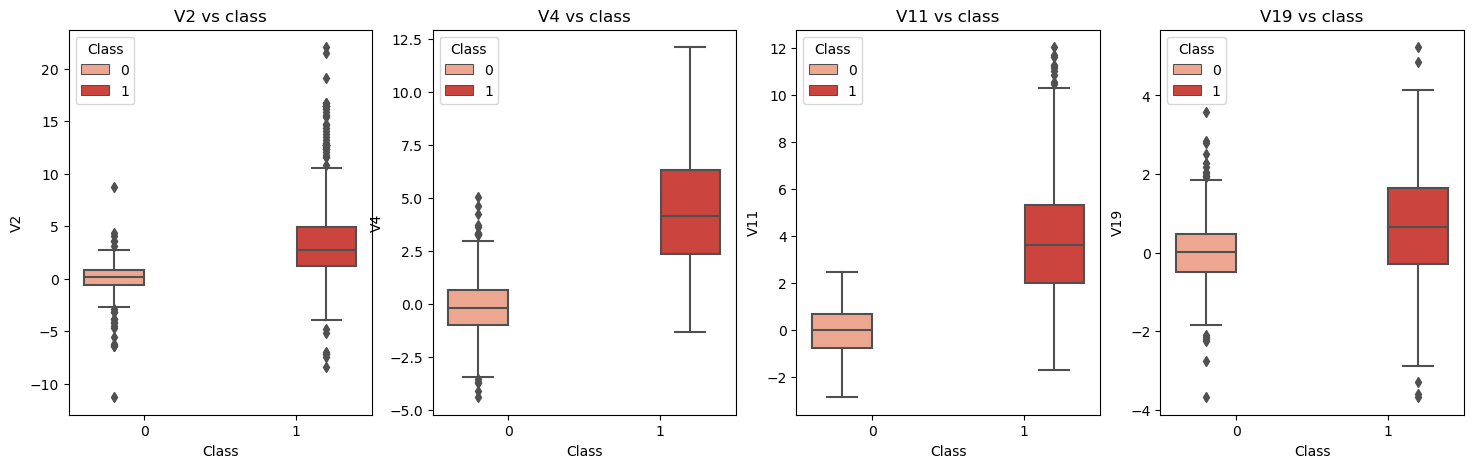

In [37]:
fig,ax = plt.subplots(1,4,figsize=(18,5))
sns.boxplot(x='Class',y='V2',data=undersample_df,hue="Class",ax=ax[0],palette='Reds')
ax[0].set_title("V2 vs class")

sns.boxplot(x='Class',y='V4',data=undersample_df,hue="Class",ax=ax[1],palette='Reds')
ax[1].set_title("V4 vs class")

sns.boxplot(x='Class',y='V11',data=undersample_df,hue="Class",ax=ax[2],palette='Reds')
ax[2].set_title("V11 vs class")

sns.boxplot(x='Class',y='V19',data=undersample_df,hue="Class",ax=ax[3],palette='Reds')
ax[3].set_title("V19 vs class")
plt.show()

In negative correlation - V17 does not have any outlier in box plot

In positive correlation - v4 does not have any outlier in box plot

In [38]:
pd.options.display.max_columns=35

In [39]:
undersample_df.describe()

,Amount_scale,Time_scale,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,1.151870,0.022651,-2.436788,1.818393,-3.477740,2.227601,-1.527837,-0.655632,-2.777526,0.314522,-1.317590,-2.839151,1.880220,-3.137182,-0.077887,-3.509740,-0.045788,-2.052174,-3.323847,-1.109820,0.352602,0.181377,0.349219,-0.013008,-0.040055,-0.065258,0.015362,0.015790,0.087117,0.045923,0.500000
std,3.277125,0.566368,5.473032,3.680256,6.230738,3.224808,4.215536,1.772790,5.847136,4.848304,2.282145,4.528651,2.785846,4.579994,1.013878,4.642429,1.007029,3.489212,5.974788,2.420045,1.283512,1.051931,2.785423,1.177185,1.211790,0.565894,0.682343,0.477295,1.009760,0.441941,0.500254
min,-0.307413,-0.992704,-30.552380,-11.284608,-31.103685,-4.384542,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-2.871610,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.145429,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.314128,-7.263482,-1.869290,0.000000
25%,-0.282436,-0.457116,-2.871640,-0.122862,-5.084967,-0.219536,-1.828002,-1.587624,-3.044451,-0.188536,-2.298358,-4.572043,-0.197378,-5.495221,-0.808868,-6.721799,-0.633360,-3.543426,-5.302111,-1.823911,-0.452396,-0.182379,-0.176837,-0.574814,-0.245552,-0.414444,-0.336146,-0.292825,-0.063791,-0.061006,0.000000
50%,-0.042828,-0.078643,-0.845491,0.981696,-1.300310,1.307692,-0.392476,-0.618475,-0.707189,0.189360,-0.705459,-0.883423,1.058097,-0.804040,-0.068569,-1.120823,-0.015458,-0.608856,-0.518430,-0.322779,0.234983,0.037614,0.143915,-0.021295,-0.040381,-0.009332,0.040259,-0.008619,0.060428,0.040354,0.500000
75%,1.089779,0.582053,0.928529,2.777569,0.389224,4.229038,0.603565,0.148170,0.320115,0.912601,0.118470,0.042974,3.586130,0.168082,0.638892,0.117354,0.623274,0.336689,0.225483,0.378451,1.028997,0.415533,0.642471,0.564606,0.186529,0.359807,0.397869,0.320103,0.454884,0.228594,1.000000
max,29.398030,1.033835,2.332661,22.057729,3.401994,12.114672,11.095089,6.474115,5.802537,20.007208,5.887747,9.671690,12.018913,1.947692,3.143758,3.442422,2.548740,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.240495,2.208209,2.745261,3.052358,3.762568,1.000000


In [40]:
# Removing of outlier from Negative correlated columns
# From v14 Feature
from scipy import stats
v14_df = undersample_df['V14'].loc[undersample_df['Class']==1].values
q25, q75 = np.percentile(v14_df,25), np.percentile(v14_df,75)
print(f"25 quantile : {q25} and 75 quantile: {q75}")
v14_iqr = q75-q25
print(f"Inter quantile range: {v14_iqr}")

v14_cutoff = 1.5*v14_iqr
print(f"The cutoff for outlier v14: {v14_cutoff}")

v14_min = q25-v14_cutoff
v14_max=q75+v14_cutoff
print(f"minimum cutoff: {v14_min} , maximum cutoff: {v14_max}")

v14_outlier = []
for value in v14_df:
    if value < v14_min or value > v14_max:
        v14_outlier.append(value)
print(f"The number of outliers in v14 is: {len(v14_outlier)}")
print(f"Outliers are: {v14_outlier}")
print(len(v14_df))
undersample_df = undersample_df.drop((undersample_df[((undersample_df['V14']<v14_min) | (undersample_df['V14']>v14_max)) & (undersample_df['Class']==1)]).index,axis=0)


25 quantile : -9.692722964972386 and 75 quantile: -4.282820849486865
Inter quantile range: 5.409902115485521
The cutoff for outlier v14: 8.114853173228282
minimum cutoff: -17.807576138200666 , maximum cutoff: 3.8320323237414167
The number of outliers in v14 is: 4
Outliers are: [-18.4937733551053, -18.0499976898594, -19.2143254902614, -18.8220867423816]
492


In [41]:
# From v12 Feature
from scipy import stats
v12_df = undersample_df['V12'].loc[undersample_df['Class']==1].values
q25, q75 = np.percentile(v12_df,25), np.percentile(v12_df,75)
print(f"25 quantile : {q25} and 75 quantile: {q75}")
v12_iqr = q75-q25
print(f"Inter quantile range: {v12_iqr}")

v12_cutoff = 1.5*v12_iqr
print(f"The cutoff for outlier v12: {v12_cutoff}")

v12_min = q25-v12_cutoff
v12_max=q75+v12_cutoff
print(f"minimum cutoff: {v12_min} , maximum cutoff: {v12_max}")

v12_outlier = []
for value in v12_df:
    if value < v12_min or value > v12_max:
        v12_outlier.append(value)
print(f"The number of outliers in v12 is: {len(v12_outlier)}")
print(f"Outliers are: {v12_outlier}")
print(len(v12_df))
undersample_df = undersample_df.drop((undersample_df[((undersample_df['V12']<v12_min) | (undersample_df['V12']>v12_max)) & (undersample_df['Class']==1)]).index,axis=0)
undersample_df

25 quantile : -8.67303320439115 and 75 quantile: -2.893030568676315
Inter quantile range: 5.780002635714835
The cutoff for outlier v12: 8.670003953572252
minimum cutoff: -17.3430371579634 , maximum cutoff: 5.776973384895937
The number of outliers in v12 is: 4
Outliers are: [-18.6837146333443, -18.0475965708216, -18.4311310279993, -18.5536970096458]
488


,Amount_scale,Time_scale,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
244966,0.710683,0.797249,1.935471,-0.948913,-1.114630,-1.743597,-0.354357,-0.061229,-0.554269,0.100220,1.912379,-0.823296,0.550530,1.182524,-0.106002,0.253054,0.654992,-0.013034,-0.726841,0.449908,1.241868,-0.018896,-0.180043,-0.532852,0.266350,0.011552,-0.388996,-0.574940,0.005769,-0.037442,0
199005,-0.293440,0.564715,-0.468699,1.336465,-0.579008,-0.392868,0.796268,-0.745615,0.689569,0.243549,-0.210672,-1.677802,-1.527840,-0.175475,0.231877,-1.571725,-0.903416,0.376458,1.050477,0.563970,0.036715,-0.189201,0.070075,0.348409,-0.347685,-0.712302,-0.124489,0.605671,0.013971,0.133046,0
163735,-0.244673,0.369847,-0.631602,0.988949,1.228256,-0.487472,0.580647,-0.275729,1.079815,-0.166883,-0.377153,0.047497,0.468938,-0.379821,-1.541647,0.421904,-0.186019,-0.231066,-0.356926,0.133310,1.427194,0.162237,-0.351702,-0.834355,-0.360043,-0.364289,0.367849,0.442916,-0.088008,-0.131476,0
62180,0.339831,-0.405632,1.137152,0.134520,0.196730,0.955990,-0.180340,-0.449203,0.110193,-0.016425,-0.153566,0.167983,0.936096,0.427680,-0.757603,0.727906,0.352363,0.444241,-0.761046,0.379596,0.118018,-0.083619,-0.105484,-0.459330,-0.054167,-0.034960,0.480227,-0.524949,-0.000886,0.017088,0
42784,0.328233,-0.510450,-10.940739,6.261586,-14.182339,7.183602,-9.951363,-3.860820,-13.547302,7.096472,-6.294029,-13.608143,7.127165,-12.611004,1.214556,-13.906297,1.514070,-11.125739,-19.716257,-7.552789,3.656787,-0.088342,2.267448,-0.492029,-0.239303,0.454368,-0.101611,0.446997,0.062293,-0.439770,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258403,3.828687,0.868737,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,-3.272569,1.168216,-2.134732,1.128313,-4.566010,-0.126950,-2.826986,-2.865750,-0.912934,0.421144,3.136338,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,1
70589,3.351778,-0.361318,-2.042608,1.573578,-2.372652,-0.572676,-2.097353,-0.174142,-3.039520,-1.634233,-0.594809,-5.459602,2.378537,-2.330271,-0.246233,-4.058523,-0.316983,-2.522661,-5.603400,-0.778440,0.860212,0.825566,-0.723326,0.501222,-0.696892,-0.600514,0.127547,-0.786072,0.606097,0.171697,1
120988,24.328513,-0.101681,-2.102905,-6.434792,-0.668216,1.009567,-3.363899,0.510210,1.123043,-0.279681,-0.373183,-0.271791,1.129240,0.686519,0.422595,-0.345834,-1.194298,1.098685,0.556368,-0.776895,0.566064,3.634908,1.131621,-0.577265,-1.527686,0.672693,-0.311401,-0.462302,-0.279648,0.322888,0
42936,0.526514,-0.509722,-12.980943,6.720508,-13.455636,8.698610,-11.479552,-2.681519,-14.019291,8.218191,-7.930900,-12.695947,5.589362,-11.960866,1.538671,-9.887214,0.633979,-11.350244,-21.710188,-8.859452,3.629714,-0.843303,2.549628,-0.532228,-0.235096,0.673209,0.226598,-0.006168,-1.185696,-0.747361,1


In [42]:
# From v10 Feature
from scipy import stats
v10_df = undersample_df['V10'].loc[undersample_df['Class']==1].values
q25, q75 = np.percentile(v10_df,25), np.percentile(v10_df,75)
print(f"25 quantile : {q25} and 75 quantile: {q75}")
v10_iqr = q75-q25
print(f"Inter quantile range: {v10_iqr}")

v10_cutoff = 1.5*v10_iqr
print(f"The cutoff for outlier v10: {v10_cutoff}")

v10_min = q25-v10_cutoff
v10_max=q75+v10_cutoff
print(f"minimum cutoff: {v10_min} , maximum cutoff: {v10_max}")

v10_outlier = []
for value in v10_df:
    if value < v10_min or value > v10_max:
        v10_outlier.append(value)
print(f"The number of outliers in v10 is: {len(v10_outlier)}")
print(f"Outliers are: {v10_outlier}")
print(len(v10_df))
undersample_df = undersample_df.drop((undersample_df[((undersample_df['V10']<v10_min) | (undersample_df['V10']>v10_max)) & (undersample_df['Class']==1)]).index,axis=0)
print(len(undersample_df))

25 quantile : -7.466658535821847 and 75 quantile: -2.5118611381562523
Inter quantile range: 4.954797397665595
The cutoff for outlier v10: 7.432196096498393
minimum cutoff: -14.89885463232024 , maximum cutoff: 4.92033495834214
The number of outliers in v10 is: 27
Outliers are: [-15.1237521803455, -16.6496281595399, -15.2399619587112, -17.1415136412892, -23.2282548357516, -16.2556117491401, -22.1870885620007, -20.9491915543611, -16.6011969664137, -16.7460441053944, -15.2318333653018, -22.1870885620007, -15.2399619587112, -14.9246547735487, -22.1870885620007, -14.9246547735487, -18.2711681738888, -15.5637913387301, -24.4031849699728, -15.5637913387301, -18.9132433348732, -22.1870885620007, -24.5882624372475, -15.3460988468775, -16.3035376590131, -19.836148851696, -15.1241628144947]
484
949


In [43]:
undersample_df

,Amount_scale,Time_scale,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
244966,0.710683,0.797249,1.935471,-0.948913,-1.114630,-1.743597,-0.354357,-0.061229,-0.554269,0.100220,1.912379,-0.823296,0.550530,1.182524,-0.106002,0.253054,0.654992,-0.013034,-0.726841,0.449908,1.241868,-0.018896,-0.180043,-0.532852,0.266350,0.011552,-0.388996,-0.574940,0.005769,-0.037442,0
199005,-0.293440,0.564715,-0.468699,1.336465,-0.579008,-0.392868,0.796268,-0.745615,0.689569,0.243549,-0.210672,-1.677802,-1.527840,-0.175475,0.231877,-1.571725,-0.903416,0.376458,1.050477,0.563970,0.036715,-0.189201,0.070075,0.348409,-0.347685,-0.712302,-0.124489,0.605671,0.013971,0.133046,0
163735,-0.244673,0.369847,-0.631602,0.988949,1.228256,-0.487472,0.580647,-0.275729,1.079815,-0.166883,-0.377153,0.047497,0.468938,-0.379821,-1.541647,0.421904,-0.186019,-0.231066,-0.356926,0.133310,1.427194,0.162237,-0.351702,-0.834355,-0.360043,-0.364289,0.367849,0.442916,-0.088008,-0.131476,0
62180,0.339831,-0.405632,1.137152,0.134520,0.196730,0.955990,-0.180340,-0.449203,0.110193,-0.016425,-0.153566,0.167983,0.936096,0.427680,-0.757603,0.727906,0.352363,0.444241,-0.761046,0.379596,0.118018,-0.083619,-0.105484,-0.459330,-0.054167,-0.034960,0.480227,-0.524949,-0.000886,0.017088,0
42784,0.328233,-0.510450,-10.940739,6.261586,-14.182339,7.183602,-9.951363,-3.860820,-13.547302,7.096472,-6.294029,-13.608143,7.127165,-12.611004,1.214556,-13.906297,1.514070,-11.125739,-19.716257,-7.552789,3.656787,-0.088342,2.267448,-0.492029,-0.239303,0.454368,-0.101611,0.446997,0.062293,-0.439770,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258403,3.828687,0.868737,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,-3.272569,1.168216,-2.134732,1.128313,-4.566010,-0.126950,-2.826986,-2.865750,-0.912934,0.421144,3.136338,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,1
70589,3.351778,-0.361318,-2.042608,1.573578,-2.372652,-0.572676,-2.097353,-0.174142,-3.039520,-1.634233,-0.594809,-5.459602,2.378537,-2.330271,-0.246233,-4.058523,-0.316983,-2.522661,-5.603400,-0.778440,0.860212,0.825566,-0.723326,0.501222,-0.696892,-0.600514,0.127547,-0.786072,0.606097,0.171697,1
120988,24.328513,-0.101681,-2.102905,-6.434792,-0.668216,1.009567,-3.363899,0.510210,1.123043,-0.279681,-0.373183,-0.271791,1.129240,0.686519,0.422595,-0.345834,-1.194298,1.098685,0.556368,-0.776895,0.566064,3.634908,1.131621,-0.577265,-1.527686,0.672693,-0.311401,-0.462302,-0.279648,0.322888,0
42936,0.526514,-0.509722,-12.980943,6.720508,-13.455636,8.698610,-11.479552,-2.681519,-14.019291,8.218191,-7.930900,-12.695947,5.589362,-11.960866,1.538671,-9.887214,0.633979,-11.350244,-21.710188,-8.859452,3.629714,-0.843303,2.549628,-0.532228,-0.235096,0.673209,0.226598,-0.006168,-1.185696,-0.747361,1


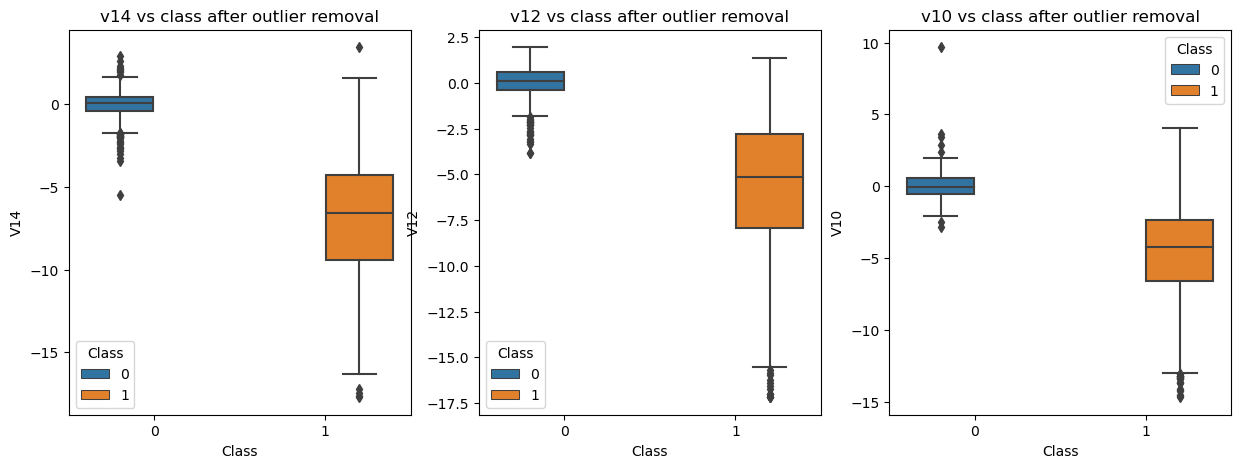

In [44]:
# checking agian for outlier by Box plot
fig, ax = plt.subplots(1,3,figsize = (15,5))

sns.boxplot(x='Class',y="V14",data=undersample_df,hue="Class",ax=ax[0])
ax[0].set_title("v14 vs class after outlier removal")

sns.boxplot(x='Class',y="V12",data=undersample_df,hue="Class",ax=ax[1])
ax[1].set_title("v12 vs class after outlier removal")

sns.boxplot(x='Class',y="V10",data=undersample_df,hue="Class",ax=ax[2])
ax[2].set_title("v10 vs class after outlier removal")
plt.show()

In [45]:
# Using t-SNE to reduce the dimensionality for visualizing data
from sklearn.manifold import TSNE
X = undersample_df.drop("Class",axis=1)
y = undersample_df["Class"]

X_reduce_tsne = TSNE(n_components=2,random_state=42).fit_transform(X.values)
X_reduce_tsne

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 17.346077 , -12.496911 ],
       [-13.320327 , -26.219988 ],
       [ -6.0950537, -27.409676 ],
       ...,
       [-10.026502 ,   7.4489064],
       [ 15.691752 ,  66.93888  ],
       [ 16.369894 , -17.614826 ]], dtype=float32)

In [46]:
X_reduce_tsne[:,0]

array([ 17.346077  , -13.320327  ,  -6.0950537 ,  11.12353   ,
        15.320415  ,   3.2183473 , -10.636993  , -11.488627  ,
         3.7313251 ,   1.5970031 ,  -9.135684  ,  -2.967092  ,
        -4.331998  ,  15.323658  ,  -1.3717129 ,  27.193945  ,
       -11.976559  ,  -7.6011653 , -13.4998455 ,  -9.45343   ,
        -3.9306517 , -11.808601  ,  -4.684356  ,  14.465995  ,
         6.2824373 , -14.667405  ,  10.144514  ,  23.070393  ,
       -15.831538  , -16.511131  ,   1.1476886 ,  27.55522   ,
       -17.611551  , -22.006227  ,  10.53859   ,  10.185542  ,
        -9.925096  ,  -1.2950534 ,  -7.1161585 ,  11.281462  ,
        -6.5373497 , -19.961346  ,  13.380004  , -17.448065  ,
        -2.5922952 ,  26.410225  , -13.116797  ,  16.254381  ,
        11.714188  ,  -3.325342  , -15.650658  ,  -2.6692343 ,
         8.983393  ,  24.341757  ,  -4.436726  , -16.665194  ,
        -4.804793  , -13.153085  , -10.0207405 ,  -5.198462  ,
       -24.049438  ,  15.858019  ,  -9.393514  ,   8.50

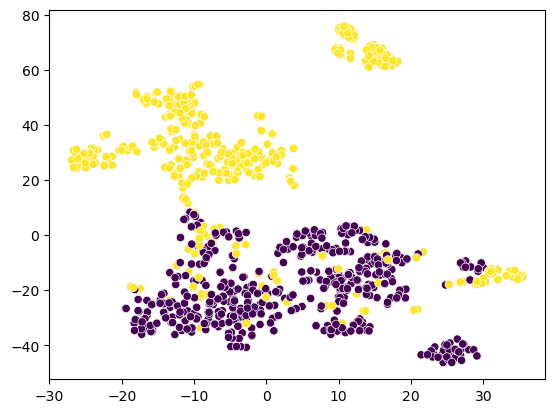

In [47]:
sns.scatterplot(x=X_reduce_tsne[:,0],y=X_reduce_tsne[:,1],c=(y==0))
sns.scatterplot(x=X_reduce_tsne[:,0],y=X_reduce_tsne[:,1],c=(y==1))
plt.show()

# Model Selection and Training

We are selecting 4 classifiers and try to train them and check for accuracy

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X = undersample_df.drop("Class",axis=1)
y = undersample_df['Class']

models = {
    "DecisionTree Classifier":DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "KNeighbors Classifier" : KNeighborsClassifier()
}

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
y_train.value_counts()

0    398
1    361
Name: Class, dtype: int64

In [51]:
y_test.value_counts()

1    96
0    94
Name: Class, dtype: int64

In [52]:
models.keys()

dict_keys(['DecisionTree Classifier', 'Logistic Regression', 'Support Vector Classifier', 'KNeighbors Classifier'])

In [53]:
list(models.keys())[1]

'Logistic Regression'

In [54]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [55]:
from sklearn.model_selection import cross_val_score
for i in range(len(models.keys())):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    training_score = cross_val_score(model,X_train,y_train,cv=5)
    print(f"Classifier: {list(models.keys())[i]} has the training score of {round(training_score.mean()*100,2)}%")
#     print(confu)
#     print(accu_score)
# Logistic Regression has best training score

Classifier: DecisionTree Classifier has the training score of 88.67%
Classifier: Logistic Regression has the training score of 92.75%
Classifier: Support Vector Classifier has the training score of 92.75%
Classifier: KNeighbors Classifier has the training score of 93.28%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [56]:
# Finding the Best parameter
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
tree_params = {
    "criterion":["gini", "entropy"],
    "splitter":['best','random'],
    'max_depth':[3,4,5,6],
    'min_samples_split':list(range(8, 20, 2)),
    'min_samples_leaf':[5,6,7],
}
tree_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=tree_params)
tree_grid.fit(X_train,y_train)
tree_best_param = tree_grid.best_estimator_

log_params ={
    "penalty": ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
log_reg_grid = GridSearchCV(LogisticRegression(),param_grid=log_params)
log_reg_grid.fit(X_train,y_train)
log_reg_best_param = log_reg_grid.best_estimator_


svm_params = {
    'C': [0.5, 0.7, 0.9, 1], 
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}
svm_grid = GridSearchCV(SVC(),param_grid=svm_params)
svm_grid.fit(X_train,y_train)
svm_best_param = svm_grid.best_estimator_


knear_params = {
    "n_neighbors": list(range(2,5,1)), 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] 
}
knear_grid = GridSearchCV(KNeighborsClassifier(),param_grid=knear_params)
knear_grid.fit(X_train,y_train)
knear_best_param = knear_grid.best_estimator_


print(tree_best_param)
print(log_reg_best_param)
print(svm_best_param)
print(knear_best_param)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       min_samples_split=10, splitter='random')
LogisticRegression(C=0.1)
SVC(C=1)
KNeighborsClassifier(n_neighbors=3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [57]:
list(range(8, 20, 2))

[8, 10, 12, 14, 16, 18]

In [58]:
log_reg_score = cross_val_score(log_reg_best_param,X_train,y_train,cv=5)
print(f"Corss Validation Score for logistic: {log_reg_score.mean()*100}")

tree_score = cross_val_score(tree_best_param,X_train,y_train,cv=5)
print(f"Corss Validation Score for Decision Tree: {tree_score.mean()*100}")

svm_score = cross_val_score(svm_best_param,X_train,y_train,cv=5)
print(f"Corss Validation Score for svm: {svm_score.mean()*100}")

knear_score = cross_val_score(knear_best_param,X_train,y_train,cv=5)
print(f"Corss Validation Score for knear: {knear_score.mean()*100}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Corss Validation Score for logistic: 93.01673056814221
Corss Validation Score for Decision Tree: 89.85447891251309
Corss Validation Score for svm: 92.75270128964796
Corss Validation Score for knear: 93.80707563611013


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Logistic regression has the highest accuracy after parameter fitting

[ 60 197 333 470 607]
[[0.98333333 0.95       0.95       0.95       0.95      ]
 [0.93908629 0.95431472 0.95431472 0.95431472 0.95431472]
 [0.93993994 0.95195195 0.94294294 0.94294294 0.94294294]
 [0.93617021 0.94255319 0.93829787 0.94680851 0.94255319]
 [0.93904448 0.94233937 0.94069193 0.94398682 0.94398682]]
[[0.94736842 0.91447368 0.92763158 0.89473684 0.9205298 ]
 [0.95394737 0.91447368 0.93421053 0.90789474 0.9205298 ]
 [0.94736842 0.92763158 0.94078947 0.91447368 0.93377483]
 [0.95394737 0.92763158 0.94078947 0.92763158 0.9205298 ]
 [0.94078947 0.92105263 0.94078947 0.92105263 0.92715232]]
[0.95666667 0.95126904 0.94414414 0.9412766  0.94200988]
[0.01333333 0.00609137 0.00407347 0.0037097  0.00192124]
[0.92094807 0.92621122 0.9328076  0.93410596 0.93016731]
[0.01715707 0.01636352 0.01131006 0.01188695 0.00895439]
[ 60 197 333 470 607]
[[0.95       0.91666667 0.9        0.86666667 0.88333333]
 [0.94923858 0.94416244 0.94416244 0.94923858 0.95431472]
 [0.93393393 0.93393393 0.9399

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[ 60 197 333 470 607]
[[0.96666667 0.95       0.95       0.95       0.95      ]
 [0.92893401 0.94923858 0.94416244 0.94416244 0.94416244]
 [0.95495495 0.96696697 0.95795796 0.95195195 0.95195195]
 [0.95319149 0.95319149 0.95744681 0.96595745 0.96808511]
 [0.96046129 0.95881384 0.96375618 0.96705107 0.95716639]]
[[0.93421053 0.90789474 0.94078947 0.90131579 0.9205298 ]
 [0.93421053 0.93421053 0.93421053 0.91447368 0.9205298 ]
 [0.94078947 0.92763158 0.94078947 0.91447368 0.92715232]
 [0.94078947 0.94078947 0.93421053 0.92105263 0.93377483]
 [0.93421053 0.94736842 0.94078947 0.93421053 0.93377483]]
[0.95333333 0.94213198 0.95675676 0.95957447 0.96144975]
[0.00666667 0.00688561 0.00556974 0.00631166 0.00354871]
[0.92094807 0.92752701 0.93016731 0.93412339 0.93807076]
[0.01500377 0.00840665 0.00987391 0.00720898 0.00533096]
[ 60 197 333 470 607]
[[0.93333333 0.9        0.9        0.9        0.9       ]
 [0.92385787 0.94416244 0.94416244 0.94416244 0.94416244]
 [0.93093093 0.94894895 0.9459

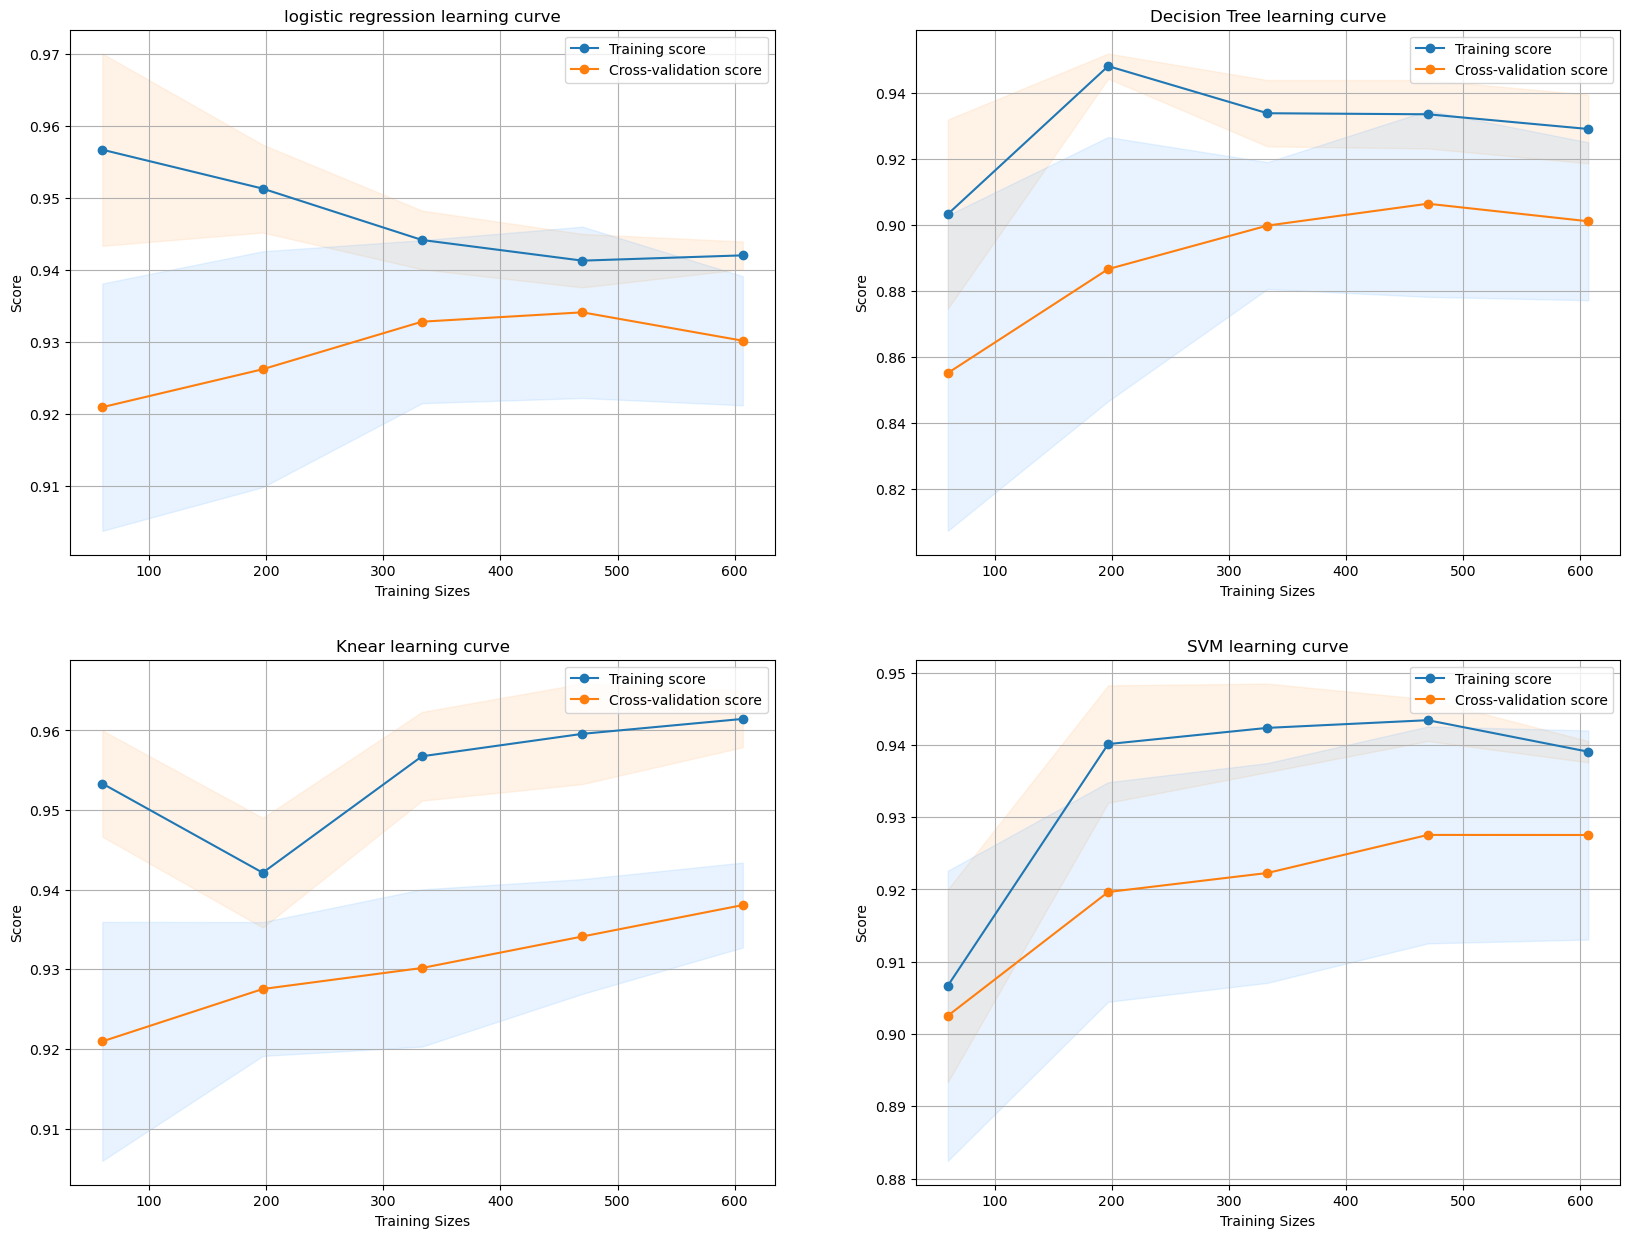

In [59]:
# Let's plot Leaning curve
from sklearn.model_selection import learning_curve

# for logistic regression
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,15))
train_sizes ,train_score, test_score = learning_curve(log_reg_best_param,X_train,y_train,cv=None,n_jobs=1,train_sizes=np.linspace(0.1,1,5))
print(train_sizes)
print(train_score)
print(test_score)
train_score_mean = np.mean(train_score,axis=1)
print(train_score_mean)
train_score_std = np.std(train_score,axis=1)
print(train_score_std)

test_score_mean = np.mean(test_score,axis=1)
print(test_score_mean)
test_score_std = np.std(test_score,axis=1)
print(test_score_std)

ax1.fill_between(train_sizes,(train_score_mean-train_score_std),(train_score_mean+train_score_std),alpha=0.1, color="#ff9124")
ax1.fill_between(train_sizes,(test_score_mean-test_score_std),(test_score_mean+test_score_std),alpha=0.1, color="#2492ff")

ax1.plot(train_sizes,train_score_mean,'o-',label= "Training score")
ax1.plot(train_sizes,test_score_mean,'o-',label= "Cross-validation score")

ax1.set_title("logistic regression learning curve")
ax1.set_xlabel("Training Sizes")
ax1.set_ylabel("Score")
ax1.grid(True)
ax1.legend(loc="best")


# for Decision tree
train_sizes ,train_score, test_score = learning_curve(tree_best_param,X_train,y_train,cv=None,n_jobs=1,train_sizes=np.linspace(0.1,1,5))
print(train_sizes)
print(train_score)
print(test_score)
train_score_mean = np.mean(train_score,axis=1)
print(train_score_mean)
train_score_std = np.std(train_score,axis=1)
print(train_score_std)

test_score_mean = np.mean(test_score,axis=1)
print(test_score_mean)
test_score_std = np.std(test_score,axis=1)
print(test_score_std)

ax2.fill_between(train_sizes,(train_score_mean-train_score_std),(train_score_mean+train_score_std),alpha=0.1, color="#ff9124")
ax2.fill_between(train_sizes,(test_score_mean-test_score_std),(test_score_mean+test_score_std),alpha=0.1, color="#2492ff")

ax2.plot(train_sizes,train_score_mean,'o-',label= "Training score")
ax2.plot(train_sizes,test_score_mean,'o-',label= "Cross-validation score")

ax2.set_title("Decision Tree learning curve")
ax2.set_xlabel("Training Sizes")
ax2.set_ylabel("Score")
ax2.grid(True)
ax2.legend(loc="best")



# For KNear Learning curve
train_sizes ,train_score, test_score = learning_curve(knear_best_param,X_train,y_train,cv=None,n_jobs=1,train_sizes=np.linspace(0.1,1,5))
print(train_sizes)
print(train_score)
print(test_score)
train_score_mean = np.mean(train_score,axis=1)
print(train_score_mean)
train_score_std = np.std(train_score,axis=1)
print(train_score_std)

test_score_mean = np.mean(test_score,axis=1)
print(test_score_mean)
test_score_std = np.std(test_score,axis=1)
print(test_score_std)

ax3.fill_between(train_sizes,(train_score_mean-train_score_std),(train_score_mean+train_score_std),alpha=0.1, color="#ff9124")
ax3.fill_between(train_sizes,(test_score_mean-test_score_std),(test_score_mean+test_score_std),alpha=0.1, color="#2492ff")

ax3.plot(train_sizes,train_score_mean,'o-',label= "Training score")
ax3.plot(train_sizes,test_score_mean,'o-',label= "Cross-validation score")

ax3.set_title("Knear learning curve")
ax3.set_xlabel("Training Sizes")
ax3.set_ylabel("Score")
ax3.grid(True)
ax3.legend(loc="best")



# For SVM learning curve
train_sizes ,train_score, test_score = learning_curve(svm_best_param,X_train,y_train,cv=None,n_jobs=1,train_sizes=np.linspace(0.1,1,5))
print(train_sizes)
print(train_score)
print(test_score)
train_score_mean = np.mean(train_score,axis=1)
print(train_score_mean)
train_score_std = np.std(train_score,axis=1)
print(train_score_std)

test_score_mean = np.mean(test_score,axis=1)
print(test_score_mean)
test_score_std = np.std(test_score,axis=1)
print(test_score_std)

ax4.fill_between(train_sizes,(train_score_mean-train_score_std),(train_score_mean+train_score_std),alpha=0.1, color="#ff9124")
ax4.fill_between(train_sizes,(test_score_mean-test_score_std),(test_score_mean+test_score_std),alpha=0.1, color="#2492ff")

ax4.plot(train_sizes,train_score_mean,'o-',label= "Training score")
ax4.plot(train_sizes,test_score_mean,'o-',label= "Cross-validation score")

ax4.set_title("SVM learning curve")
ax4.set_xlabel("Training Sizes")
ax4.set_ylabel("Score")
ax4.grid(True)
ax4.legend(loc="best")

plt.show()

In [60]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg_best_param,X_train,y_train,cv=5,method="decision_function")

tree_pred = cross_val_predict(tree_best_param,X_train,y_train,cv=5)

svm_pred = cross_val_predict(svm_best_param,X_train,y_train,cv=5,method="decision_function")

knear_pred = cross_val_predict(knear_best_param,X_train,y_train,cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [61]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print(f"Logistic Regression ROC AUC score is: {roc_auc_score(y_train,log_reg_pred)}")
print(f"Knear ROC AUC score is: {roc_auc_score(y_train,knear_pred)}")
print(f"SVM Regression ROC AUC score is: {roc_auc_score(y_train,svm_pred)}")
print(f"Decision Tree ROC AUC score is: {roc_auc_score(y_train,tree_pred)}")

Logistic Regression ROC AUC score is: 0.9743314912512703
Knear ROC AUC score is: 0.9365769289661605
SVM Regression ROC AUC score is: 0.9795445370898815
Decision Tree ROC AUC score is: 0.9013384094990187


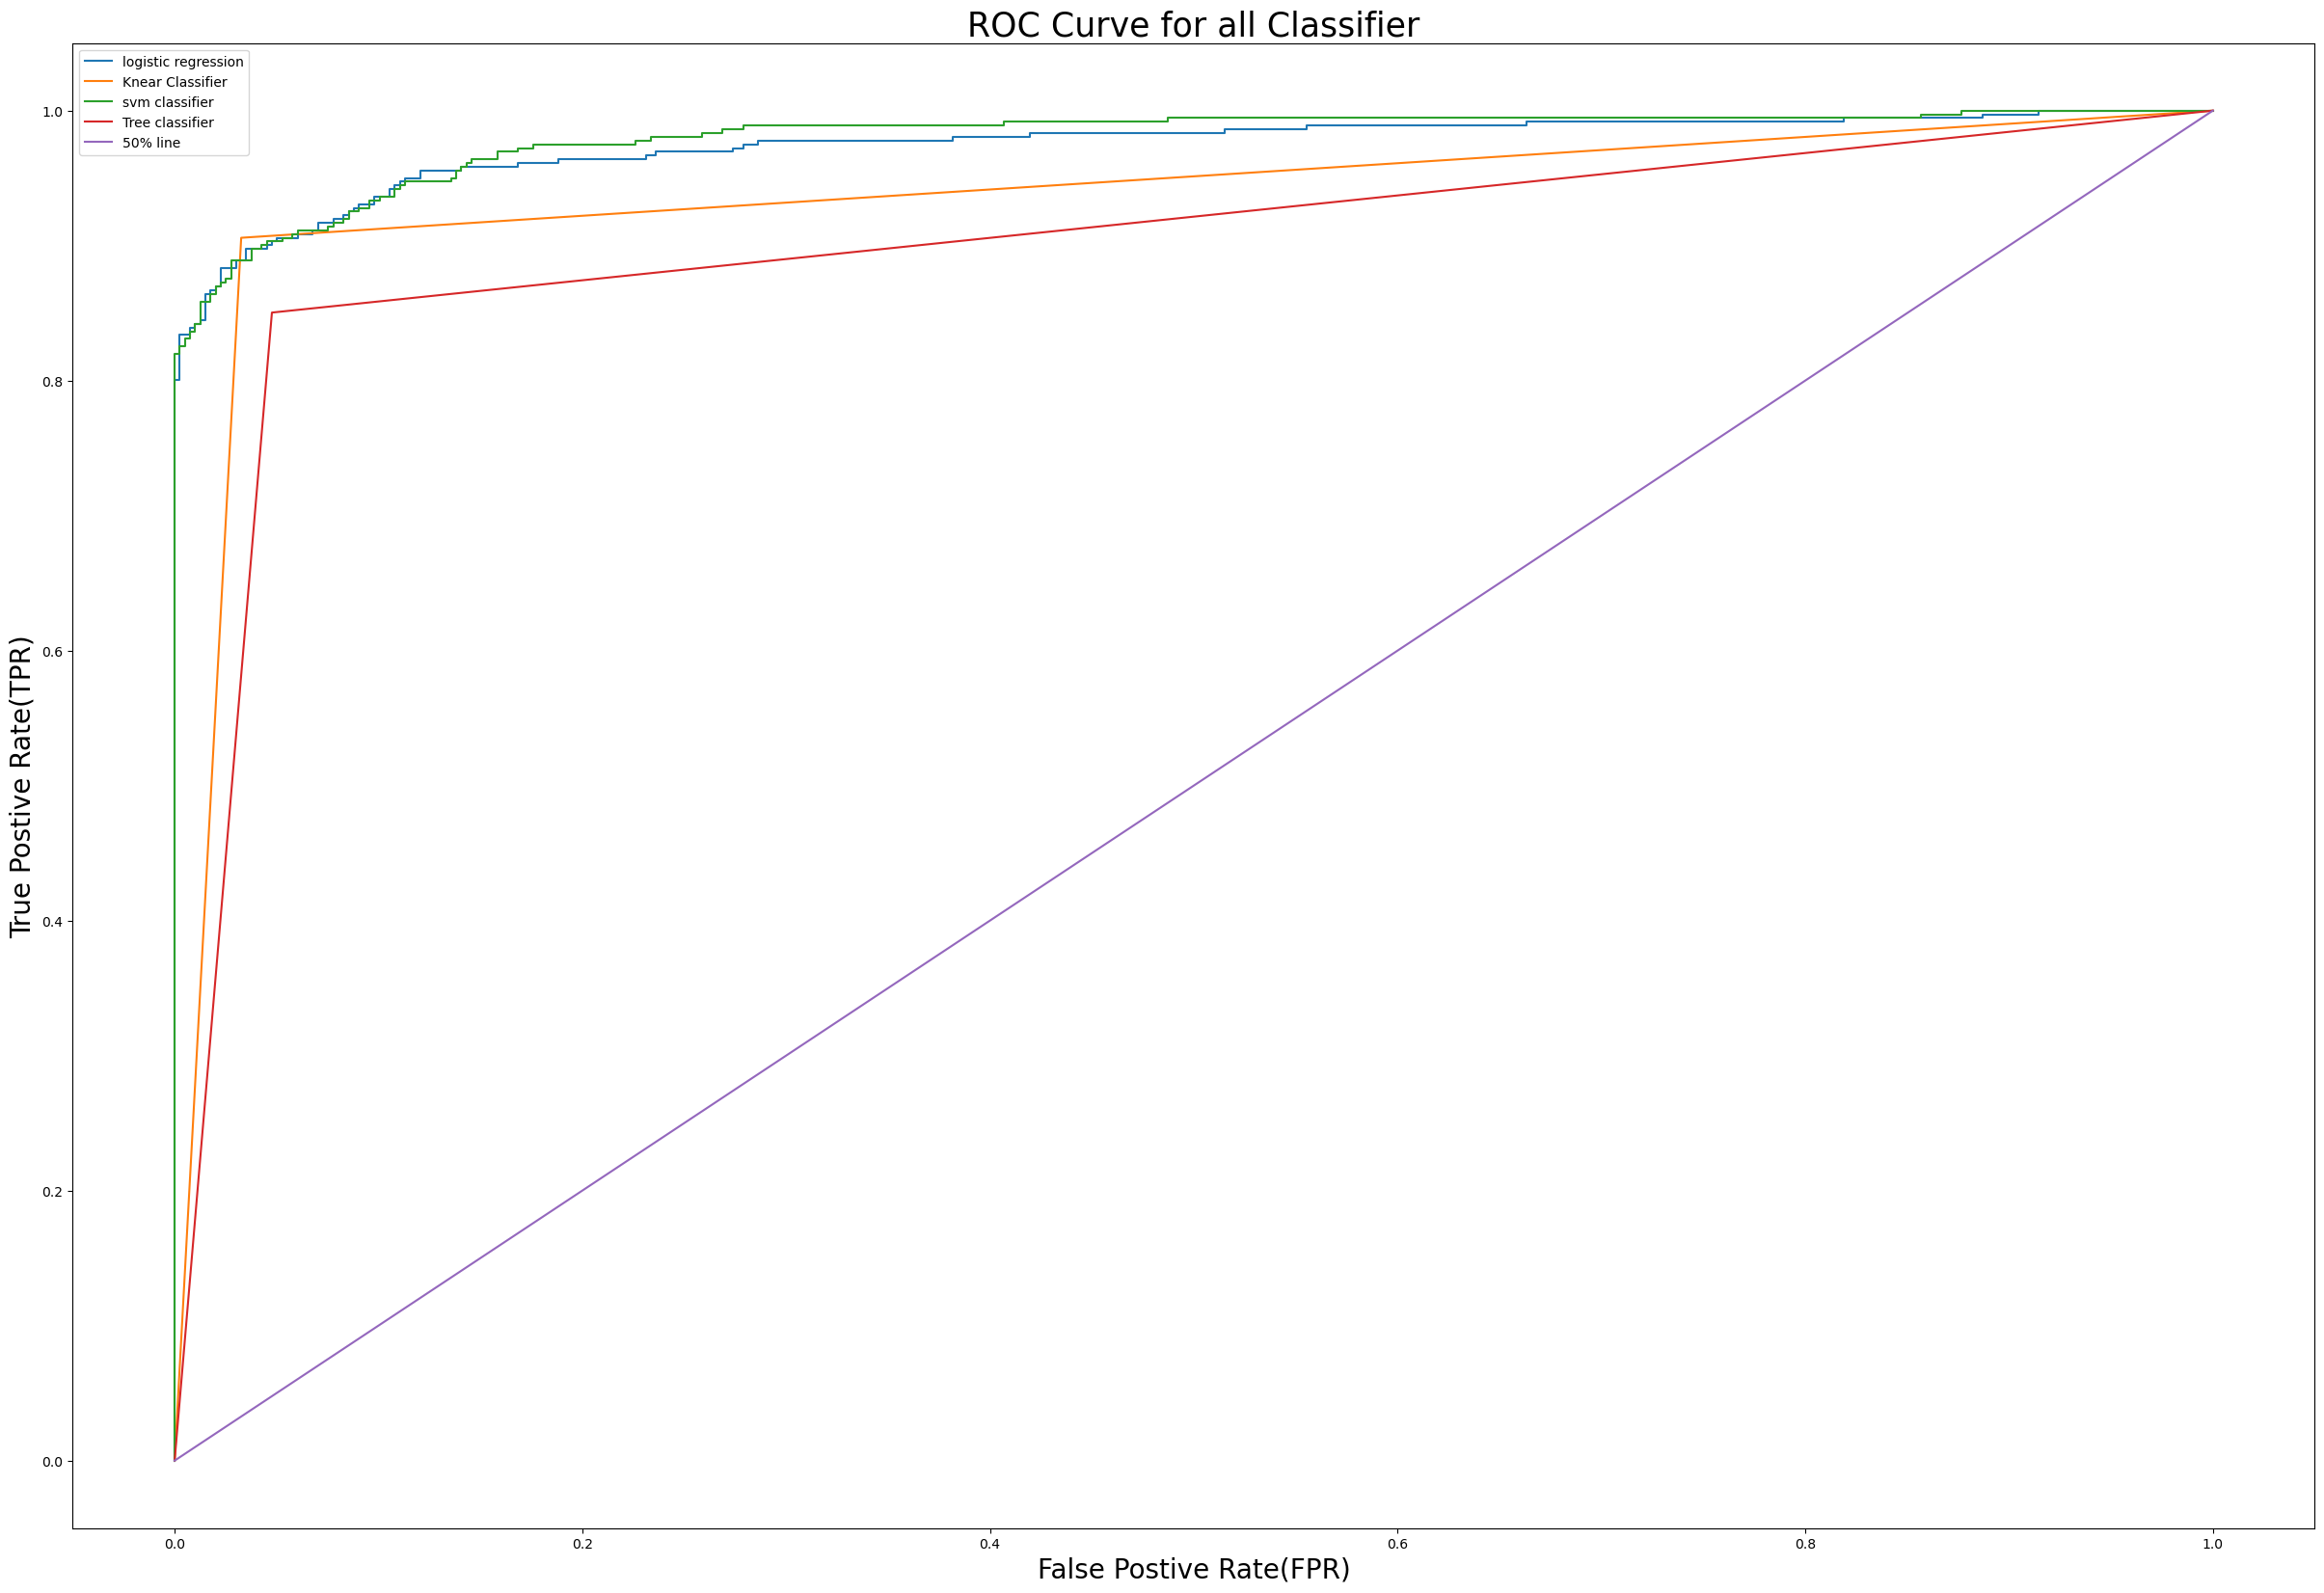

In [62]:
# ROC Curve
from sklearn.metrics import roc_curve
log_fpr, log_tpr,log_threshold = roc_curve(y_train,log_reg_pred)
# print(log_fpr,log_tpr,log_threshold)
# print(len(log_fpr))
knear_fpr,knear_tpr,knear_threshold = roc_curve(y_train,knear_pred)
svm_frp,svm_tpr,svm_threshold = roc_curve(y_train,svm_pred)
tree_fpr,tree_tpr,tree_threshold = roc_curve(y_train,tree_pred)

plt.figure(figsize=(30,20))
plt.title("ROC Curve for all Classifier",fontsize=25)
plt.plot(log_fpr,log_tpr,label="logistic regression")
plt.plot(knear_fpr,knear_tpr,label="Knear Classifier")
plt.plot(svm_frp,svm_tpr,label= "svm classifier")
plt.plot(tree_fpr,tree_tpr,label="Tree classifier")
plt.plot([0,1],[0,1],label="50% line")
plt.xlabel("False Postive Rate(FPR)",fontsize=20)
plt.ylabel("True Postive Rate(TPR)",fontsize=20)
plt.legend(loc= 'best')
plt.show()

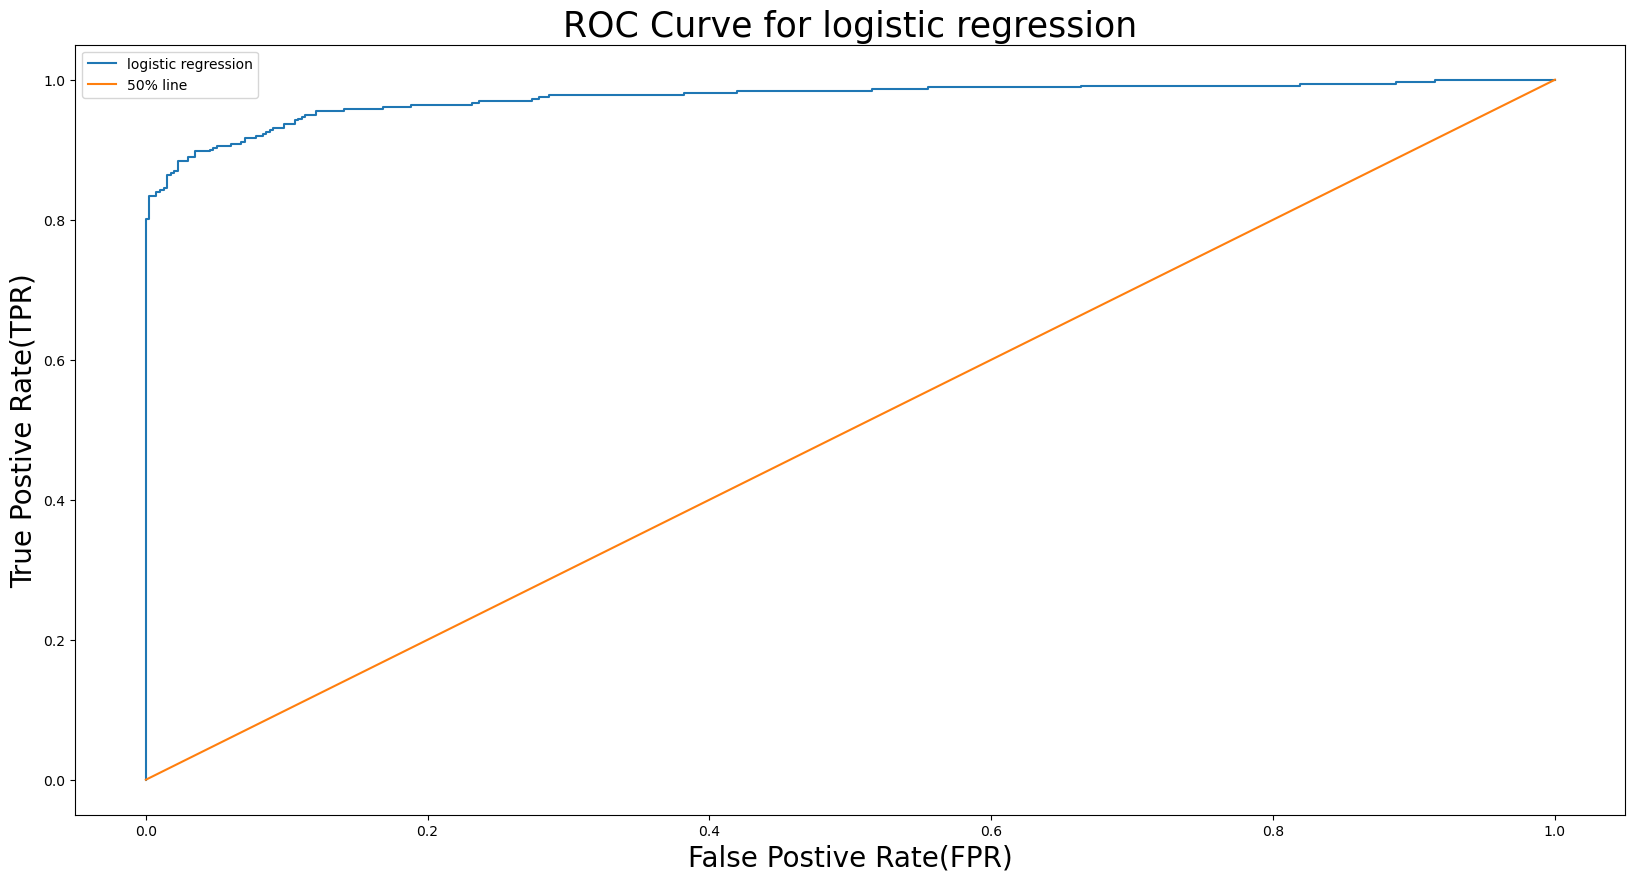

In [63]:
# ROC Curve for logistic regression curve
log_fpr, log_tpr,log_threshold = roc_curve(y_train,log_reg_pred)


plt.figure(figsize=(20,10))
plt.title("ROC Curve for logistic regression",fontsize=25)
plt.plot(log_fpr,log_tpr,label="logistic regression")
plt.plot([0,1],[0,1],label="50% line")
plt.xlabel("False Postive Rate(FPR)",fontsize=20)
plt.ylabel("True Postive Rate(TPR)",fontsize=20)
plt.legend(loc= 'best')
plt.show()

In [65]:
# We will undersample during cross validating
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score

undersample_X = credit_card_df.drop('Class', axis=1)
undersample_y = credit_card_df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg_best_param) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))
    
print(f"undersample_accuracy: {undersample_accuracy}")
print(f"undersample_precision: {undersample_precision}")
print(f"undersample_recall: {undersample_recall}")
print(f"undersample_f1: {undersample_f1}")

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})
undersample_accuracy: [0.6727671713846829, 0.7275340692137199, 0.8762097039654151, 0.7428295551800567, 0.7731571901950888]
undersample_precision: [0.005137786081270434, 0.0057683063611600706, 0.011934011934011933, 0.006193789241472934, 0.007300672430355428]
undersample_recall: [0.9746835443037974, 0.9230769230769231, 0.8607594936708861, 0.9240506329113924, 0.9620253164556962]
undersample_f1: [0.01022169

In [66]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
y_pred = log_reg_best_param.predict(X_train)

print(f"precision_score: {precision_score(y_train,y_pred)}")
print(f"recall_score: {recall_score(y_train,y_pred)}")
print(f"f1_score: {f1_score(y_train,y_pred)}")
print(f"accuracy_score: {accuracy_score(y_train,y_pred)}")

precision_score: 0.7777777777777778
recall_score: 0.9307479224376731
f1_score: 0.8474148802017655
accuracy_score: 0.8405797101449275


In [67]:
original_Xtest

array([[-3.07273108e-01,  6.36779097e-01, -1.29844323e+00, ...,
         8.41294588e-01,  6.43094249e-01,  2.01155750e-01],
       [ 9.86389995e+00,  6.37343014e-01, -2.35634817e+00, ...,
         1.08361135e-01,  1.13082816e+00,  4.15702789e-01],
       [ 6.56745616e-03,  6.39281477e-01, -4.66650010e+00, ...,
         6.30638836e-01, -5.13880223e-01,  7.29525850e-01],
       ...,
       [ 6.41095508e-01,  1.03497457e+00,  1.91956501e+00, ...,
        -8.73705959e-02,  4.45477214e-03, -2.65608286e-02],
       [-1.67679732e-01,  1.03497457e+00, -2.40440050e-01, ...,
         5.46668462e-01,  1.08820735e-01,  1.04532821e-01],
       [ 2.72479564e+00,  1.03502156e+00, -5.33412522e-01, ...,
        -8.18267121e-01, -2.41530880e-03,  1.36489143e-02]])

In [68]:
undersample_y_score = log_reg_best_param.decision_function(original_Xtest)
undersample_y_score

array([ 0.52891524, 13.78110999,  4.70346974, ..., -3.14503383,
       -1.5953886 , -0.05412777])

In [69]:
from sklearn.metrics import average_precision_score
undersample_average_precision= average_precision_score(original_ytest,undersample_y_score)
print(f"average_precision_recall_score: {undersample_average_precision}")

average_precision_recall_score: 0.02091714812786548


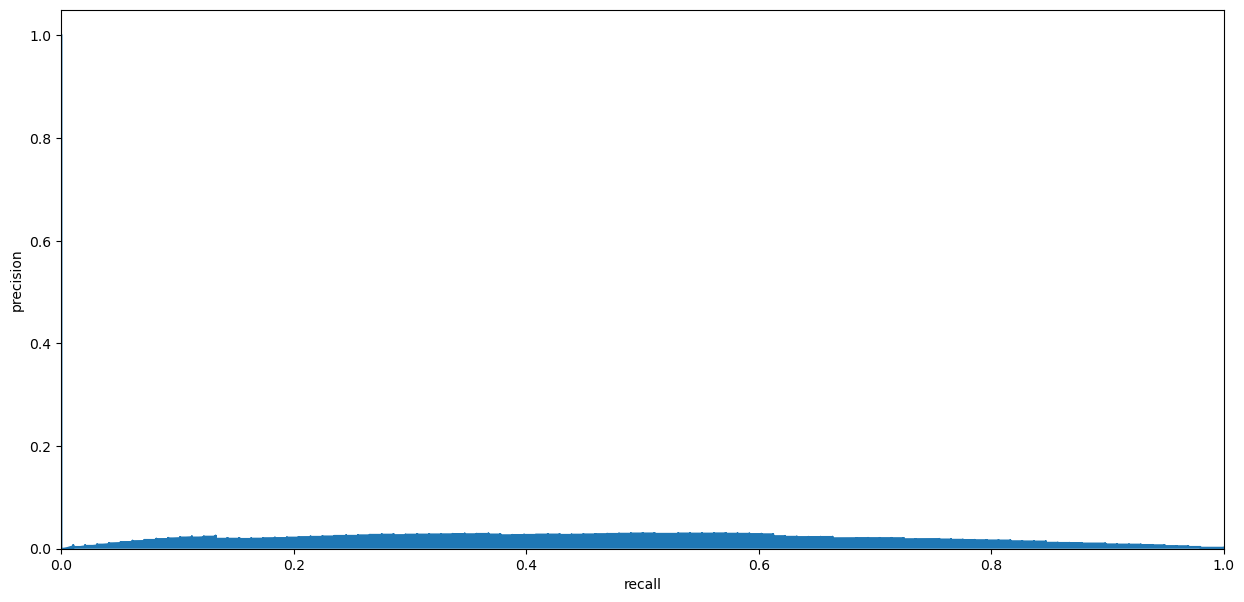

In [70]:
# Precision recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(original_ytest,undersample_y_score)

plt.figure(figsize=(15,7))
plt.step(recall,precision)
plt.fill_between(recall,precision)
plt.xlim(0,1)
plt.ylim(0,1.05)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

# Oversampling (SMOTE)

In [91]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

print(f"Train X set: {len(original_Xtrain)}, Test X set: {len(original_Xtest)}")
print(f"Train y set: {len(original_ytrain)}, Test y set: {len(original_ytest)}")

accuracy_1st = []
precision_1st = []
recall_1st = []
f1_1st =[]
auc_1st = []

smote_log_params = {
    "penalty": ['l1', 'l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

smote_log_model = LogisticRegression()
smote_random = RandomizedSearchCV(smote_log_model,param_distributions=smote_log_params,n_iter=4)
print(smote_random)


stratifiedkfold = StratifiedKFold(n_splits=5,shuffle=False,random_state=None)
for train,test in stratifiedkfold.split(original_Xtrain,original_ytrain):
    print(train,test)
    pipeline = make_pipeline(SMOTE(sampling_strategy="minority"),smote_random)
    model = pipeline.fit(original_Xtrain[train],original_ytrain[train])
    smote_best_est = smote_random.best_estimator_
    prediction = smote_best_est.predict(original_Xtrain[test])
    print(smote_best_est)
    print(prediction)
    
    accuracy_1st.append(pipeline.score(original_Xtrain[test],original_ytrain[test]))
    precision_1st.append(precision_score(original_ytrain[test],prediction))
    recall_1st.append(recall_score(original_ytrain[test],prediction))
    f1_1st.append(f1_score(original_ytrain[test],prediction))
    auc_1st.append(roc_auc_score(original_ytrain[test],prediction))
    
print("-"*30)
print(f"Accuracy score: {np.mean(accuracy_1st)}")
print(f"Precision score: {np.mean(precision_1st)}")
print(f"Recall score: {np.mean(recall_1st)}")
print(f"f1 score: {np.mean(f1_1st)}")
print(f"ROC_AUC score: {np.mean(auc_1st)}")
print("-"*30)

Train X set: 227846, Test X set: 56961
Train y set: 227846, Test y set: 56961
RandomizedSearchCV(estimator=LogisticRegression(), n_iter=4,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})
[ 17453  17480  18466 ... 227843 227844 227845] [    0     1     2 ... 45630 45631 45632]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=0.1)
[1 0 1 ... 0 0 0]
[     0      1      2 ... 227843 227844 227845] [17453 17480 18466 ... 91190 91191 91192]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

LogisticRegression(C=0.001)
[1 1 1 ... 0 0 0]
[     0      1      2 ... 227843 227844 227845] [ 57248  57470  57615 ... 136732 136733 136734]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=0.01)
[1 1 1 ... 0 0 0]
[     0      1      2 ... 227843 227844 227845] [107637 108258 108708 ... 182324 182325 182326]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
T

LogisticRegression(C=10)
[1 0 1 ... 0 0 0]
[     0      1      2 ... 182324 182325 182326] [150925 151006 151007 ... 227843 227844 227845]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

LogisticRegression(C=1)
[1 1 1 ... 0 0 0]
------------------------------
Accuracy score: 0.9430323551376196
Precision score: 0.06270715413990924
Recall score: 0.9162934112301201
f1 score: 0.11553446569251768
ROC_AUC score: 0.9296860096072173
------------------------------


In [92]:
original_Xtrain

array([[ 1.78327395, -0.99498349, -1.35980713, ..., -0.18911484,
         0.13355838, -0.02105305],
       [-0.26982463, -0.99498349,  1.19185711, ...,  0.12589453,
        -0.0089831 ,  0.01472417],
       [ 4.98372109, -0.99497175, -1.35835406, ..., -0.13909657,
        -0.05535279, -0.05975184],
       ...,
       [ 0.47509257,  0.71156851, -1.24615005, ..., -0.40307615,
         0.25907773,  0.07726675],
       [-0.16781946,  0.71156851, -0.11060264, ..., -0.19372256,
         0.14398337,  0.134559  ],
       [ 0.11541955,  0.71156851, -0.41332759, ...,  0.46357404,
         0.11998961,  0.13441132]])

In [93]:
from sklearn.metrics import classification_report
label = ["No Fraud","Fraud"]
smote_prediction = smote_best_est.predict(original_Xtest)
print(classification_report(original_ytest,smote_prediction,target_names=label))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [94]:
# Average precision recall score
from sklearn.metrics import average_precision_score

smote_y_score = smote_best_est.decision_function(original_Xtest)

print(f"Average precision_recall_score is: {average_precision_score(original_ytest,smote_y_score)}")

Average precision_recall_score is: 0.7538429570866394


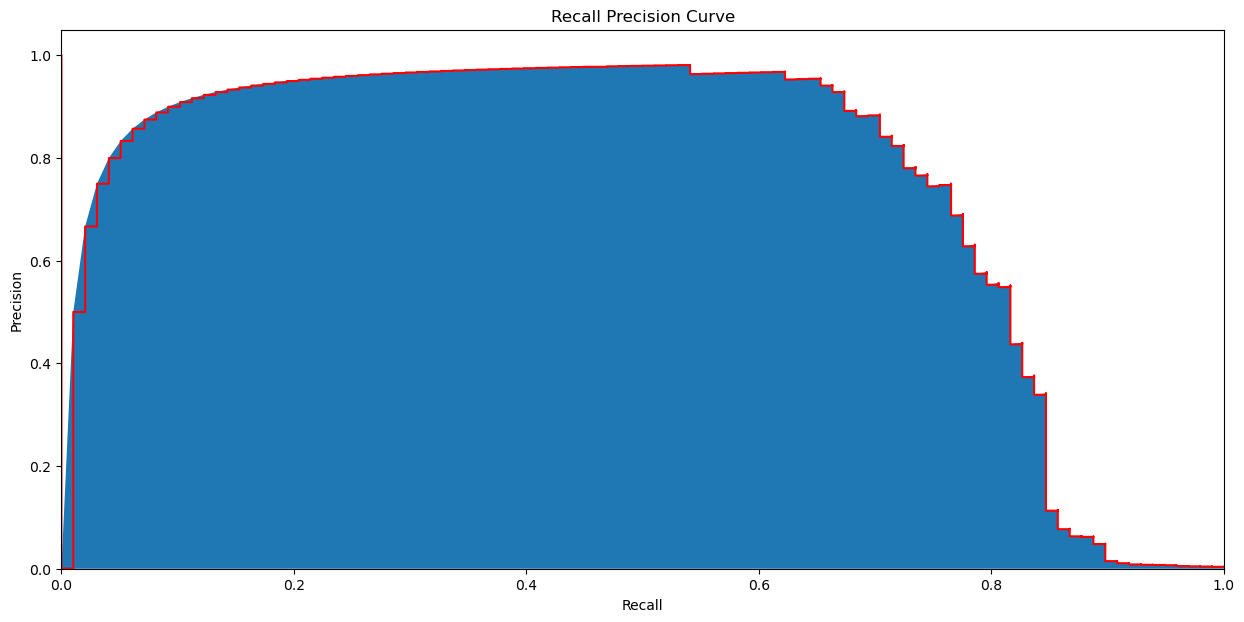

In [95]:
from sklearn.metrics import precision_recall_curve

precision,recall,_ = precision_recall_curve(original_ytest,smote_y_score)

plt.figure(figsize=(15,7))

plt.step(recall,precision,color="r")
plt.fill_between(recall,precision)

plt.xlim(0,1)
plt.ylim(0,1.05)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall Precision Curve")
plt.show()

In [96]:
sm = SMOTE(sampling_strategy="minority",random_state=42)

Xsm_train,ysm_train = sm.fit_resample(original_Xtrain,original_ytrain)
print(len(Xsm_train),len(ysm_train))
print(len(original_Xtrain),len(original_ytrain))

454904 454904
227846 227846


In [97]:
smote_log_params = {
    "penalty": ['l1', 'l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

smote_log_reg = smote_random.best_estimator_
smote_log_reg.fit(Xsm_train,ysm_train)
print(smote_log_reg)

LogisticRegression(C=1)


In [98]:
len(X_test)

190

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[92  2]
 [ 6 90]]
[[90  4]
 [ 8 88]]
[[94  0]
 [ 8 88]]
[[90  4]
 [ 6 90]]


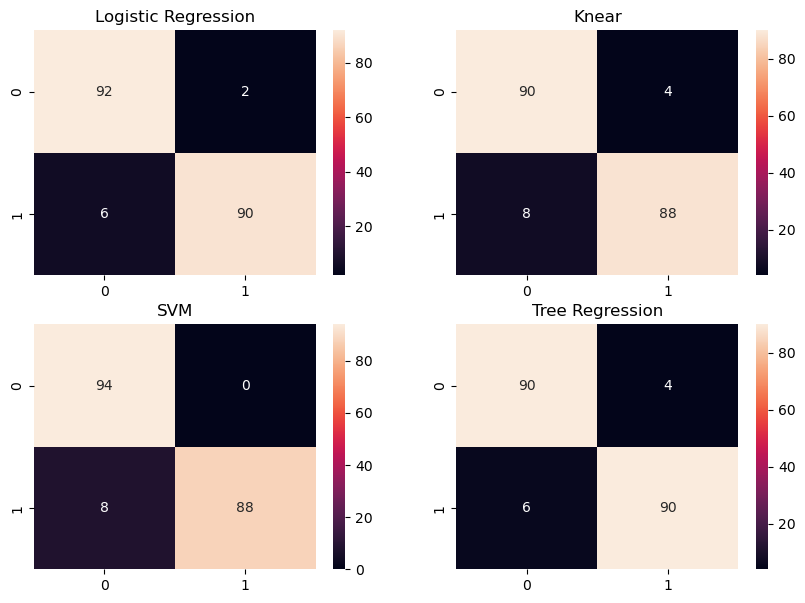

In [99]:
from sklearn.metrics import confusion_matrix

# logistic regresion fitted with SMOTE
smote_y_pred = smote_log_reg.predict(X_test)

# other are from undersampling
knear_y_pred = knear_best_param.predict(X_test)
svm_y_pred = svm_best_param.predict(X_test)
tree_y_pred = tree_best_param.predict(X_test)


log_reg_cf = confusion_matrix(y_test,smote_y_pred)
knear_cf = confusion_matrix(y_test,knear_y_pred)
svm_cf = confusion_matrix(y_test,svm_y_pred)
tree_cf = confusion_matrix(y_test,tree_y_pred)

print(log_reg_cf)
print(knear_cf)
print(svm_cf)
print(tree_cf)


fig, ax = plt.subplots(2,2,figsize=(10,7))

sns.heatmap(log_reg_cf,ax=ax[0][0],annot=True)
ax[0][0].set_title("Logistic Regression")

sns.heatmap(knear_cf,ax=ax[0][1],annot=True)
ax[0][1].set_title("Knear")

sns.heatmap(svm_cf,ax=ax[1][0],annot=True)
ax[1][0].set_title("SVM")

sns.heatmap(tree_cf,ax=ax[1][1],annot=True)
ax[1][1].set_title("Tree Regression")

plt.show()

In [100]:
(y_test==1).sum()

96

In [101]:
from sklearn.metrics import classification_report

print(f"Logistic Regression") 
print(classification_report(y_test,smote_y_pred,target_names=label))

print(f"Knear") 
print(classification_report(y_test,knear_y_pred,target_names=label))

print(f"SVM") 
print(classification_report(y_test,svm_y_pred,target_names=label))

print(f"Decision Tree") 
print(classification_report(y_test,tree_y_pred,target_names=label))

Logistic Regression
              precision    recall  f1-score   support

    No Fraud       0.94      0.98      0.96        94
       Fraud       0.98      0.94      0.96        96

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

Knear
              precision    recall  f1-score   support

    No Fraud       0.92      0.96      0.94        94
       Fraud       0.96      0.92      0.94        96

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

SVM
              precision    recall  f1-score   support

    No Fraud       0.92      1.00      0.96        94
       Fraud       1.00      0.92      0.96        96

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96 

In [102]:
# Accuracy Score
from sklearn.metrics import accuracy_score

under_log_y_pred = log_reg_best_param.predict(X_test)

# Undersampling for logistci regression
undersample_score = accuracy_score(y_test,under_log_y_pred)
print(undersample_score)

# Oversampling 
oversample_score = accuracy_score(y_test,smote_y_pred)
print(oversample_score)

0.9578947368421052
0.9578947368421052


# Neural Network

In [116]:

from keras import Sequential 
from keras.layers import Dense
from keras.activations import sigmoid
from keras.optimizers import Adam

input_neurons = X_train.shape[1]

undersample_model = Sequential([Dense(input_neurons,input_dim=input_neurons,activation="relu"),
                                  Dense(32,activation="relu"),
                                  Dense(1,activation="sigmoid")])
undersample_model.summary()

C:\Users\deepa\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,955 (7.64 KB)

 Trainable params: 1,955 (7.64 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
undersample_model.compile(Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [118]:
len(X_train)

759

In [119]:
len(X_test)

190

In [122]:
undersample_model.fit(X_train,y_train,validation_split=0.2,batch_size=25,epochs=20,shuffle=True,verbose=2)

Epoch 1/20
25/25 - 1s - 37ms/step - accuracy: 0.5124 - loss: 0.6315 - val_accuracy: 0.7171 - val_loss: 0.4667
Epoch 2/20
25/25 - 0s - 3ms/step - accuracy: 0.8320 - loss: 0.4070 - val_accuracy: 0.8816 - val_loss: 0.3726
Epoch 3/20
25/25 - 0s - 3ms/step - accuracy: 0.9110 - loss: 0.3115 - val_accuracy: 0.9079 - val_loss: 0.3203
Epoch 4/20
25/25 - 0s - 2ms/step - accuracy: 0.9308 - loss: 0.2519 - val_accuracy: 0.9145 - val_loss: 0.2834
Epoch 5/20
25/25 - 0s - 3ms/step - accuracy: 0.9357 - loss: 0.2134 - val_accuracy: 0.9145 - val_loss: 0.2603
Epoch 6/20
25/25 - 0s - 3ms/step - accuracy: 0.9407 - loss: 0.1863 - val_accuracy: 0.9211 - val_loss: 0.2399
Epoch 7/20
25/25 - 0s - 2ms/step - accuracy: 0.9473 - loss: 0.1661 - val_accuracy: 0.9211 - val_loss: 0.2290
Epoch 8/20
25/25 - 0s - 2ms/step - accuracy: 0.9489 - loss: 0.1509 - val_accuracy: 0.9211 - val_loss: 0.2153
Epoch 9/20
25/25 - 0s - 3ms/step - accuracy: 0.9522 - loss: 0.1395 - val_accuracy: 0.9408 - val_loss: 0.2112
Epoch 10/20
25/25 

In [124]:
len(original_Xtest)

56961

In [125]:
undersample_model_y_pred = undersample_model.predict(original_Xtest,batch_size=200,verbose=2)
undersample_model_y_pred

285/285 - 0s - 762us/step


array([[0.99991363],
       [0.99999833],
       [0.98523784],
       ...,
       [0.0725724 ],
       [0.02453818],
       [0.09007734]], dtype=float32)

In [128]:
undersample_model_y_pred_update = np.where(undersample_model_y_pred > 0.5, 1,0)
undersample_model_y_pred_update

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [131]:
from sklearn.metrics import confusion_matrix
nn_undersample_cf_on_original_data = confusion_matrix(original_ytest,original_ytest)
nn_undersample_cf_on_original_data

array([[56863,     0],
       [    0,    98]], dtype=int64)

In [132]:
nn_undersample_cf = confusion_matrix(original_ytest,undersample_model_y_pred_update)
nn_undersample_cf

array([[55607,  1256],
       [    9,    89]], dtype=int64)

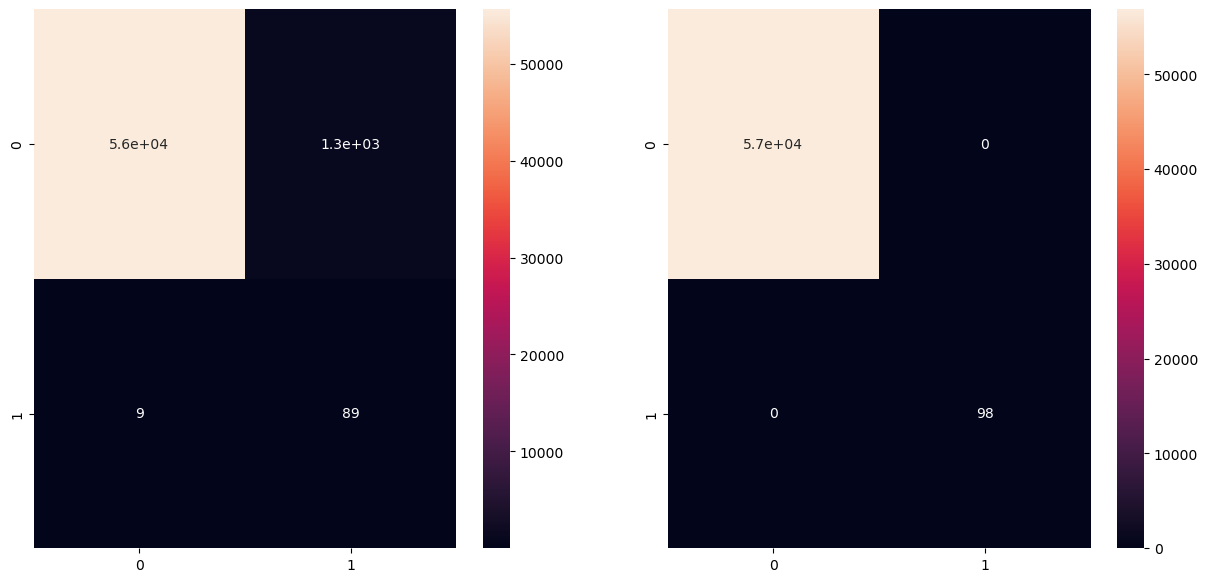

In [136]:
fig,ax = plt.subplots(1,2,figsize=(15,7))

sns.heatmap(nn_undersample_cf,ax=ax[0],annot=True)

sns.heatmap(nn_undersample_cf_on_original_data,ax=ax[1],annot=True)

plt.show()

# Neural Network Oversampling

In [138]:
Xsm_train.shape

(454904, 30)

In [142]:
input_neu = Xsm_train.shape[1]
input_neu

30

In [143]:
oversample_model = Sequential([Dense(input_neu,input_dim=input_neu,activation="relu"),
                               Dense(32,activation="relu"),
                               Dense(1,activation="sigmoid")])
oversample_model.summary()

C:\Users\deepa\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,955 (7.64 KB)

 Trainable params: 1,955 (7.64 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
oversample_model.compile(Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [145]:
oversample_model.fit(Xsm_train,ysm_train,validation_split=0.2,batch_size=300,epochs=20,shuffle=True,verbose=2)

Epoch 1/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9721 - loss: 0.0756 - val_accuracy: 0.9917 - val_loss: 0.0262
Epoch 2/20
1214/1214 - 1s - 878us/step - accuracy: 0.9962 - loss: 0.0153 - val_accuracy: 0.9997 - val_loss: 0.0100
Epoch 3/20
1214/1214 - 1s - 891us/step - accuracy: 0.9985 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 4/20
1214/1214 - 1s - 896us/step - accuracy: 0.9989 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/20
1214/1214 - 1s - 886us/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9999 - val_loss: 0.0029
Epoch 6/20
1214/1214 - 1s - 893us/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/20
1214/1214 - 1s - 884us/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9997 - val_loss: 0.0027
Epoch 8/20
1214/1214 - 1s - 891us/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 9/20
1214/1214 - 1s - 885us/step - accuracy: 0.9995 - loss: 0.0023 - val_acc

In [148]:
oversample_y_pred_nn = oversample_model.predict(original_Xtest,batch_size=200,verbose=2)
oversample_y_pred_nn

285/285 - 0s - 740us/step


array([[5.2250266e-01],
       [9.9999648e-01],
       [1.2326251e-35],
       ...,
       [0.0000000e+00],
       [5.6628172e-22],
       [5.3603178e-16]], dtype=float32)

In [147]:
len(original_ytest)

56961

In [149]:
oversample_y_pred_nn_class = np.where(oversample_y_pred_nn > 0.5, 1,0)
oversample_y_pred_nn_class

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [150]:
oversample_cf_on_original_data = confusion_matrix(original_ytest,original_ytest)
oversample_cf_on_original_data

array([[56863,     0],
       [    0,    98]], dtype=int64)

In [151]:
oversample_cf = confusion_matrix(original_ytest,oversample_y_pred_nn_class)
oversample_cf

array([[56855,     8],
       [   30,    68]], dtype=int64)

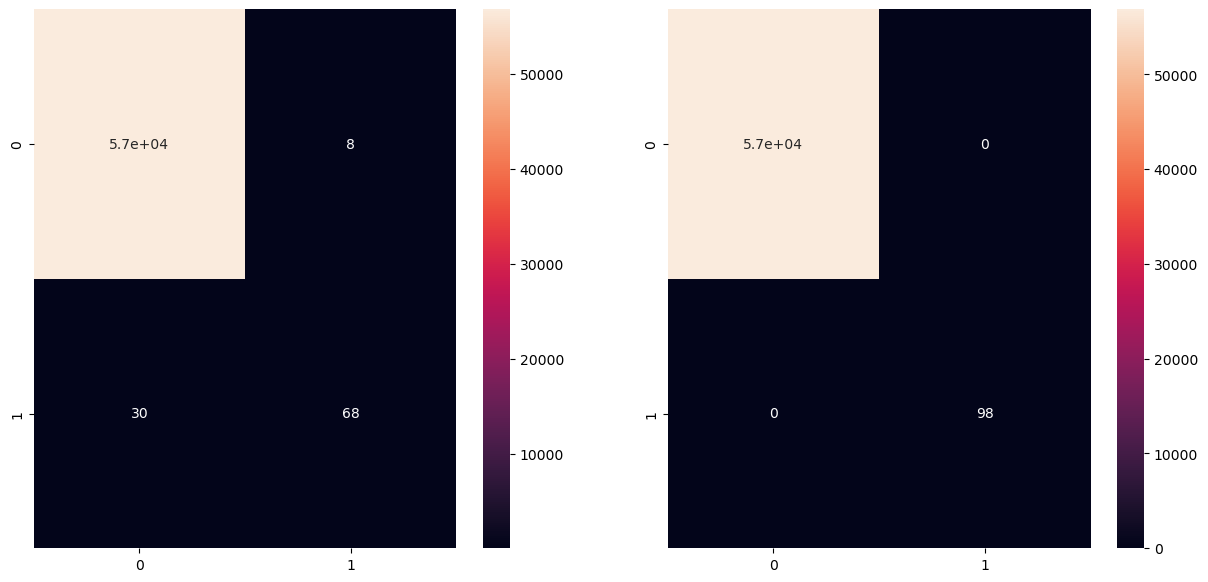

In [152]:
fig,ax = plt.subplots(1,2,figsize=(15,7))

sns.heatmap(oversample_cf,ax=ax[0],annot=True)

sns.heatmap(oversample_cf_on_original_data,ax=ax[1],annot=True)

plt.show()